1) Write a python program using Neural Networks for demonstrating Reinforcement Agent, Environment and Reward.

In [ ]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Define the environment
env = gym.make('CartPole-v1')

# Neural network for the agent
class PolicyNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        return self.fc(x)

# Agent class
class Agent:
    def __init__(self, input_size, output_size):
        self.policy_network = PolicyNetwork(input_size, output_size)
        self.optimizer = optim.Adam(self.policy_network.parameters(), lr=0.01)
        self.output_size = output_size  # Store output size

    def select_action(self, state):
        state = torch.from_numpy(state).float()
        probabilities = self.policy_network(state)
        probabilities = probabilities.detach().numpy()  # Convert to numpy array
        action = np.random.choice(np.arange(self.output_size), p=probabilities)
        return action

# Training loop
agent = Agent(input_size=env.observation_space.shape[0], output_size=env.action_space.n)
num_episodes = 100

for episode in range(num_episodes):
    state = env.reset()
    episode_reward = 0

    while True:
        action = agent.select_action(state)
        next_state, reward, done, _ = env.step(action)

        agent.optimizer.zero_grad()
        state_tensor = torch.from_numpy(state).float()
        action_tensor = torch.tensor(action)
        reward_tensor = torch.tensor(reward)

        log_prob = torch.log(agent.policy_network(state_tensor)[action_tensor])
        loss = -log_prob * reward_tensor
        loss.backward()
        agent.optimizer.step()

        episode_reward += reward
        state = next_state

        if done:
            break

    if episode % 10 == 0:
        print(f"Episode {episode}, Total Reward: {episode_reward}")

env.close()


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode 0, Total Reward: 9.0
Episode 10, Total Reward: 9.0
Episode 20, Total Reward: 11.0
Episode 30, Total Reward: 10.0
Episode 40, Total Reward: 10.0
Episode 50, Total Reward: 10.0
Episode 60, Total Reward: 10.0
Episode 70, Total Reward: 10.0
Episode 80, Total Reward: 9.0
Episode 90, Total Reward: 8.0


2)Write a python program to demonstrate Markov Decision Process in Reinforcement Learning Environment

In [ ]:
import numpy as np

# Define the grid world (states)
states = [(0, 0), (0, 1), (0, 2),
          (1, 0), (1, 1), (1, 2),
          (2, 0), (2, 1), (2, 2)]

# Define possible actions (up, down, left, right)
actions = {'U': (-1, 0), 'D': (1, 0), 'L': (0, -1), 'R': (0, 1)}

# Define the state transition function
def transition(state, action):
    if state in states:
        new_state = (state[0] + action[0], state[1] + action[1])
        if new_state in states:
            return new_state
    return state  # Stay in the same state if the action leads to an invalid state

# Define the rewards for each state
rewards = {
    (0, 0): -1,
    (0, 1): -1,
    (0, 2): -1,
    (1, 0): -1,
    (1, 2): -1,
    (2, 0): -1,
    (2, 1): -1,
    (2, 2): 1,  # The goal state with a reward of 1
}

# Define the discount factor
gamma = 0.9
# Define a policy (agent's strategy) - deterministic for simplicity
policy = {
    (0, 0): 'R',  # Move right when in (0, 0)
    (0, 1): 'R',
    (0, 2): 'U',
    (1, 0): 'R',
    (1, 2): 'U',
    (2, 0): 'R',
    (2, 1): 'R',
    (2, 2): 'U',  # Move up when in (2, 2)
}

# Perform value iteration to find the optimal values of each state
V = {state: 0 for state in states}

while True:
    delta = 0
    for state in states:
        if state not in policy:
            continue
        v = V[state]
        action = policy[state]
        next_state = transition(state, actions[action])
        reward = rewards[state]  # Corrected line
        V[state] = reward + gamma * V[next_state]
        delta = max(delta, abs(v - V[state]))
    if delta < 1e-6:
        break

# Print the values of each state
for i in range(3):
    for j in range(3):
        state = (i, j)
        print(f"State {state}: Value = {V[state]:.2f}")

State (0, 0): Value = -10.00
State (0, 1): Value = -10.00
State (0, 2): Value = -10.00
State (1, 0): Value = -1.00
State (1, 1): Value = 0.00
State (1, 2): Value = -10.00
State (2, 0): Value = -8.38
State (2, 1): Value = -8.20
State (2, 2): Value = -8.00


3) Demonstrate the functions behind state and policies in Reinforcement Learning using

In [ ]:
# Define states and actions
states = [(0, 0), (0, 1), (1, 0), (1, 1)]
actions = {'Up': (-1, 0), 'Down': (1, 0), 'Left': (0, -1), 'Right': (0, 1)}

# Define a deterministic policy (for each state, specify the action to take)
policy = {
    (0, 0): 'Right',
    (0, 1): 'Down',
    (1, 0): 'Right',
    (1, 1): 'Up'
}

# Function to get the next state based on the current state and action
def get_next_state(state, action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state in states:
        return next_state
    return state

# Function to determine the action the agent takes in a given state
def get_action(state):
    return policy[state]

# Demonstrate how the functions work
current_state = (0, 0)
for _ in range(3):
    action = get_action(current_state)
    next_state = get_next_state(current_state, action)
    print(f"Current State: {current_state}, Action: {action}, Next State: {next_state}")
    current_state = next_state


Current State: (0, 0), Action: Right, Next State: (0, 1)
Current State: (0, 1), Action: Down, Next State: (1, 1)
Current State: (1, 1), Action: Up, Next State: (0, 1)


4)Demonstrate Bell-man equation functionality in Reinforcement Learning using Python Programming through 3 X 3 grid

In [ ]:
import numpy as np

# Define the grid world
grid_world = np.zeros((3, 3))

# Define the state transition function (up, down, left, right)
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

# Define the reward for each state
rewards = {
    (0, 2): 10,  # Goal state
    (1, 2): -10,  # Penalty state
}

# Define the discount factor
gamma = 0.9

# Perform the Bellman update for state values
num_iterations = 100
for _ in range(num_iterations):
    new_grid_world = np.copy(grid_world)
    for i in range(3):
        for j in range(3):
            if (i, j) not in rewards:
                new_values = []
                for action in actions:
                    next_i, next_j = i + action[0], j + action[1]
                    if 0 <= next_i < 3 and 0 <= next_j < 3:
                        new_values.append(rewards.get((next_i, next_j), 0) + grid_world[next_i, next_j])
                if new_values:
                    new_grid_world[i, j] = max(new_values) * gamma
    grid_world = new_grid_world

# Print the final state values
print("State Values:")
print(grid_world)


State Values:
[[8.1   9.    0.   ]
 [7.29  8.1   0.   ]
 [6.561 7.29  6.561]]


5)Induce a Mouse-pile of cheese strategy to get maximum rewards for the mouse in 3 X 4 grid using Bellman Equation using python programming in a reinforcement Learning environment

In [ ]:
import numpy as np

# Define the grid world
n_rows, n_cols = 3, 4
grid_world = np.zeros((n_rows, n_cols))

# Define rewards
rewards = {
    (0, 3): 10,   # Cheese state
    (1, 3): -10,  # Penalty state
}

# Define discount factor
gamma = 0.9

# Define actions
actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
action_names = ['Right', 'Left', 'Down', 'Up']

# Function to calculate the Bellman update for a state
def bellman_update(i, j, action):
    if (i, j) in rewards:
        return rewards[(i, j)]

    total_reward = 0
    for a, (di, dj) in enumerate(actions):
        next_i, next_j = i + di, j + dj
        if 0 <= next_i < n_rows and 0 <= next_j < n_cols:
            total_reward += 0.25 * (grid_world[next_i, next_j] * gamma)

    return total_reward

# Perform the Bellman update for state values
num_iterations = 100
for _ in range(num_iterations):
    new_grid_world = np.zeros((n_rows, n_cols))
    for i in range(n_rows):
        for j in range(n_cols):
            new_grid_world[i, j] = max([bellman_update(i, j, a) for a in actions])
    grid_world = new_grid_world

# Calculate the optimal policy
optimal_policy = np.empty((n_rows, n_cols), dtype=object)
for i in range(n_rows):
    for j in range(n_cols):
        if (i, j) in rewards:
            optimal_policy[i, j] = "Cheese" if rewards[(i, j)] > 0 else "Penalty"
        else:
            # Find the index of the action with the maximum expected reward
            action_index = np.argmax([bellman_update(i, j, a) for a in actions])
            optimal_policy[i, j] = action_names[action_index]

# Print the optimal policy
print("Optimal Policy:")
for i in range(n_rows):
    row_str = ""
    for j in range(n_cols):
        if (i, j) in rewards:
            row_str += f"{optimal_policy[i, j]:^8} | "
        else:
            row_str += f"{optimal_policy[i, j]:<8} | "
    print(row_str[:-2])  # Remove the extra "| " at the end


Optimal Policy:
Right    | Right    | Right    |  Cheese  
Right    | Right    | Right    | Penalty  
Right    | Right    | Right    | Right    


6)A Fire of value -1 and Maximum Reward of Value 1 placed on the (1,4) and (2,4) place of matrix and you are placed on the initial block of (1,1) on the matrix, through Reinforcement learning Strategy how will obtain the maximum reward using python programming.

In [ ]:
import numpy as np

# Define the grid world
n_rows, n_cols = 2, 5
grid_world = np.zeros((n_rows, n_cols))

# Define rewards
rewards = {
    (1, 4): 1,   # Maximum Reward
    (2, 4): 1,   # Maximum Reward
    (1, 3): -1,  # Fire state
    (2, 3): -1,  # Fire state
}

# Define discount factor
gamma = 0.9

# Define actions (up, down, left, right)
actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
action_names = ['Right', 'Left', 'Down', 'Up']

# Function to calculate the Bellman update for a state
def bellman_update(i, j, action):
    if (i, j) in rewards:
        return rewards[(i, j)]

    total_reward = 0
    for a, (di, dj) in enumerate(actions):
        next_i, next_j = i + di, j + dj
        if 0 <= next_i < n_rows and 0 <= next_j < n_cols:
            total_reward += 0.25 * (grid_world[next_i, next_j] * gamma)

    return total_reward

# Perform the Bellman update for state values
num_iterations = 100
for _ in range(num_iterations):
    new_grid_world = np.zeros((n_rows, n_cols))
    for i in range(n_rows):
        for j in range(n_cols):
            new_grid_world[i, j] = max([bellman_update(i, j, a) for a in actions])

    grid_world = new_grid_world

# Calculate the optimal policy
optimal_policy = np.empty((n_rows, n_cols), dtype=object)
for i in range(n_rows):
    for j in range(n_cols):
        if (i, j) not in rewards:
            optimal_policy[i, j] = action_names[np.argmax([bellman_update(i, j, a) for a in actions])]
        else:
            optimal_policy[i, j] = None  # Set None for cells with rewards

# Replace None with a placeholder string
optimal_policy = np.where(optimal_policy != None, optimal_policy.astype(str), 'Reward')

# Print the optimal policy
print("Optimal Policy:")
for row in optimal_policy:
    print(" | ".join(row))



Optimal Policy:
Right | Right | Right | Right | Right
Right | Right | Right | Reward | Reward


7) Display and visualize the difference in Learning of Exploitation and Expectation mechanisms by an agent in a Reinforcement Learning Environment using Python Programming

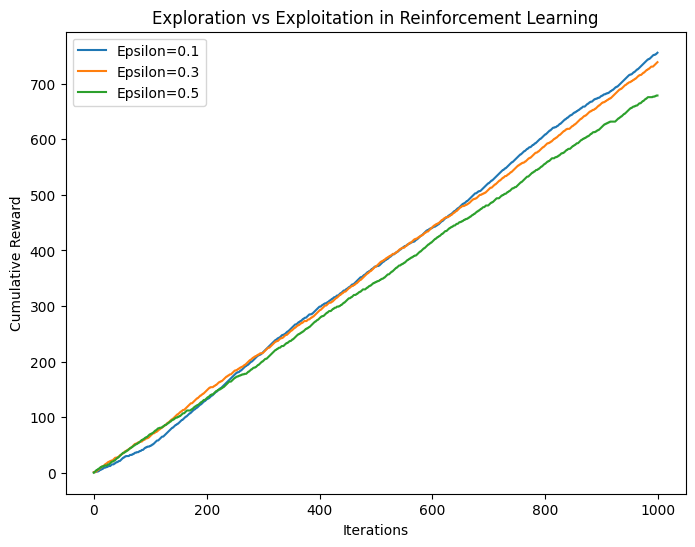

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the bandit problem with different arms having different reward probabilities
class Bandit:
    def __init__(self, arms):
        self.arms = arms

    def pull_arm(self, arm):
        return np.random.rand() < self.arms[arm]

# Epsilon-greedy algorithm for exploration and exploitation
def epsilon_greedy(epsilon, num_iterations, bandit):
    num_actions = len(bandit.arms)
    action_values = np.zeros(num_actions)
    action_attempts = np.zeros(num_actions)
    rewards = []

    for _ in range(num_iterations):
        if np.random.rand() < epsilon:
            # Exploration: Choose a random action
            action = np.random.randint(num_actions)
        else:
            # Exploitation: Choose the action with the highest estimated value
            action = np.argmax(action_values)

        reward = bandit.pull_arm(action)
        rewards.append(reward)

        # Update action attempts and estimated action values
        action_attempts[action] += 1
        action_values[action] += (reward - action_values[action]) / action_attempts[action]

    return rewards

# Define the bandit arms (reward probabilities)
arms = [0.3, 0.5, 0.8]  # Example probabilities

# Create a bandit environment
bandit = Bandit(arms)

# Run epsilon-greedy algorithm with different values of epsilon
epsilon_values = [0.1, 0.3, 0.5]
num_iterations = 1000

plt.figure(figsize=(8, 6))

for epsilon in epsilon_values:
    rewards = epsilon_greedy(epsilon, num_iterations, bandit)
    plt.plot(np.cumsum(rewards), label=f'Epsilon={epsilon}')

plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.title('Exploration vs Exploitation in Reinforcement Learning')
plt.show()


8)Demonstrate the value when exploration mechanism is implemented into the input matrix of 6X4

In [ ]:
import numpy as np
import random

# Define the grid world
n_rows, n_cols = 6, 4

# Define actions (up, down, left, right)
actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

# Define exploration probability (ε)
epsilon = 0.2

# Initialize the state values
state_values = np.zeros((n_rows, n_cols))

# Function to check if a state is within the grid boundaries
def within_bounds(state):
    row, col = state
    return 0 <= row < n_rows and 0 <= col < n_cols

# Function to choose an action using ε-greedy strategy
def choose_action(state):
    if random.uniform(0, 1) < epsilon:
        # Exploration: Choose a random action
        return random.choice(range(len(actions)))
    else:
        valid_actions = []
        for a in actions:
            next_state = (state[0] + a[0], state[1] + a[1])
            if within_bounds(next_state):
                valid_actions.append(state_values[next_state])
            else:
                valid_actions.append(float('-inf'))  # Assign negative infinity to invalid actions
        return np.argmax(valid_actions)

# Learning loop (Q-learning with temporal difference)
num_episodes = 1000

for _ in range(num_episodes):
    current_state = (0, 0)

    while True:
        action = choose_action(current_state)
        move = actions[action]
        next_state = (current_state[0] + move[0], current_state[1] + move[1])

        # Simulated reward function (example)
        if next_state == (5, 3):
            reward = 1
        else:
            reward = 0

        if within_bounds(next_state):
            # Update the state value using Q-learning (temporal difference)
            state_values[current_state] += 0.1 * (
                reward + 0.9 * state_values[next_state] - state_values[current_state]
            )

            current_state = next_state
        else:
            break  # Break the loop if the next state is out of bounds

# Display the state values with exploration
print("State Values with Exploration:")
print(state_values)


State Values with Exploration:
[[1.89167233 2.14569787 2.33948644 1.45290003]
 [1.97687691 2.43581922 2.79771384 2.80478011]
 [1.22168997 2.53470828 3.18506678 3.39079537]
 [0.53127216 3.01861106 3.56654272 4.03583973]
 [0.75348481 3.43294283 3.92976634 4.61045446]
 [1.49980102 3.71604735 4.48303353 4.15783962]]


9)Demonstrate the value when exploitation mechanism is implemented into the input matrix of 6X4

In [ ]:
import numpy as np

# Define the grid world
n_rows, n_cols = 6, 4

# Define actions (up, down, left, right)
actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

# Initialize the state values
state_values = np.zeros((n_rows, n_cols))

# Simulated reward function (example)
rewards = np.zeros((n_rows, n_cols))
rewards[5, 3] = 1  # Maximum Reward

# Discount factor
gamma = 0.9

# Exploration parameter
epsilon = 0.1

# Q-Learning: Update state values using exploitation and exploration
num_iterations = 100

for _ in range(num_iterations):
    new_state_values = np.copy(state_values)
    for i in range(n_rows):
        for j in range(n_cols):
            if rewards[i, j] != 0:
                continue
            q_values = [state_values[i + a[0], j + a[1]] for a in actions
                        if 0 <= i + a[0] < n_rows and 0 <= j + a[1] < n_cols]

            if np.random.rand() < epsilon:  # Exploration
                new_state_values[i, j] = epsilon * np.random.randn()
            else:  # Exploitation
                new_state_values[i, j] = (1 - epsilon) * (rewards[i, j] + gamma * max(q_values)) + epsilon * np.random.randn()

    state_values = new_state_values

# Display the final state values with exploration and exploitation
print("Final State Values:")
print(state_values)

Final State Values:
[[ 0.49182858  0.61186505  0.41114567  0.46813437]
 [ 0.40992056  0.38924172  0.6587025   0.45098854]
 [ 0.44125411  0.21228881  0.35736177  0.27599309]
 [ 0.56963417 -0.09355245  0.51020108  0.41491599]
 [-0.09539829 -0.04094568  0.45087262  0.42553899]
 [ 0.37723073 -0.04767737  0.39202516  0.        ]]


10)Using Tensorflow RL library create an environment, agent and demonstrate Rewards and Punishments within the Reinforcement learning environment.

In [ ]:
!pip install tf-agents
import numpy as np
from tf_agents.environments import py_environment
from tf_agents.specs import array_spec
from tf_agents.trajectories import time_step as ts

class CustomEnvironment(py_environment.PyEnvironment):
    def __init__(self):
        self._action_spec = array_spec.BoundedArraySpec(
            shape=(), dtype=np.int32, minimum=0, maximum=1, name='action')
        self._observation_spec = array_spec.BoundedArraySpec(
            shape=(1,), dtype=np.float32, minimum=0, maximum=1, name='observation')
        self._state = np.array([0.5])  # Initial state

    def action_spec(self):
        return self._action_spec

    def observation_spec(self):
        return self._observation_spec

    def _reset(self):
        self._state = np.array([0.5])
        return ts.restart(np.array(self._state, dtype=np.float32))

    def _step(self, action):
        if action == 0:  # Move left
            self._state -= 0.1
        else:  # Move right
            self._state += 0.1

        if self._state <= 0:
            reward = -0.5  # Updated punishment for going too far left
            return ts.termination(np.array(self._state, dtype=np.float32), reward)
        elif self._state >= 1:
            reward = 2.0  # Updated reward for reaching the goal
            return ts.termination(np.array(self._state, dtype=np.float32), reward)
        else:
            reward = 5.0  # No reward or punishment for intermediate steps
            return ts.transition(np.array(self._state, dtype=np.float32), reward=reward)

environment = CustomEnvironment()

time_step = environment.reset()
cumulative_reward = time_step.reward

for _ in range(10):
    action = np.random.randint(2)
    time_step = environment.step(action)
    print(f"Action: {action}, Next State: {time_step.observation}, Reward: {time_step.reward}")
    cumulative_reward += time_step.reward

print(f"Cumulative Reward: {cumulative_reward}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 11.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 41.5 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.23.0-py3-none-any.whl size=697629 sha256=2c2b3d56615704527658eb33fb66a5fd83e784218a237441d244f18c6a535685
  Stored in directory: /root/.cache/pip/wheels/3d/6f/b4/3991d4fae11d0ecb0754c11cc1b4e7745012850da4efaaf0b1
Successfully built gym
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.22.0
    Uninstalling tensorflow-probability-0.22.0:
      Successfully uninstalled tensorflow-probability-0.22.0
  Attempting uninstall: pygame
    Found existing

/usr/local/lib/python3.10/dist-packages/tf_agents/__init__.py:58: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/tf_agents/utils/common.py:91: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  distutils.version.LooseVersion(tf.__version__)


Action: 1, Next State: [0.6], Reward: 5.0
Action: 1, Next State: [0.7], Reward: 5.0
Action: 0, Next State: [0.6], Reward: 5.0
Action: 1, Next State: [0.7], Reward: 5.0
Action: 0, Next State: [0.6], Reward: 5.0
Action: 0, Next State: [0.5], Reward: 5.0
Action: 1, Next State: [0.6], Reward: 5.0
Action: 1, Next State: [0.7], Reward: 5.0
Action: 0, Next State: [0.6], Reward: 5.0
Action: 0, Next State: [0.5], Reward: 5.0
Cumulative Reward: 50.0


11)Using Monte carlo method, induce a reinforcement Learning Environment for getting Maximum reward.

In [ ]:
import random

# Define the states, actions, and rewards for a simple environment
states = [0, 1, 2, 3, 4]
actions = ['left', 'right']
rewards = {
    (0, 'left', 0): -1,
    (0, 'right', 1): 5,
    (1, 'left', 0): -1,
    (1, 'right', 0): 2,
    (2, 'left', 0): -1,
    (2, 'right', 0): 0,
    (3, 'left', 0): -1,
    (3, 'right', 1): 10,
    (4, 'left', 0): -1,
    (4, 'right', 0): -1,
}

# Initialize Q-values for state-action pairs
Q = {(state, action): 0 for state in states for action in actions}

# Define the exploration rate (epsilon) and discount factor (gamma)
epsilon = 0.1
gamma = 0.9

# Monte Carlo simulation
num_episodes = 1000
for _ in range(num_episodes):
    episode = []
    state = random.choice(states)

    while True:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)  # Exploration
        else:
            action = max(actions, key=lambda a: Q[(state, a)])  # Exploitation

        next_state = state + (1 if action == 'right' else -1)
        reward = rewards.get((state, action, 0), 0)
        episode.append((state, action, reward))
        state = next_state

        if state not in states:
            break

    G = 0
    for i, (state, action, reward) in enumerate(reversed(episode)):
        G = gamma * G + reward
        Q[(state, action)] = Q[(state, action)] + 0.1 * (G - Q[(state, action)])

# Determine the optimal policy
optimal_policy = {}
for state in states:
    optimal_action = max(actions, key=lambda a: Q[(state, a)])
    optimal_policy[state] = optimal_action

# Print the optimal policy
for state, action in optimal_policy.items():
    print(f"State {state}: Take action '{action}'")


State 0: Take action 'right'
State 1: Take action 'right'
State 2: Take action 'left'
State 3: Take action 'left'
State 4: Take action 'right'


12)Induce any concept of dynamic programming and explain the efficiency interms of computational complexity for reinforcement Learning environment using Python Programming

In [ ]:
import numpy as np

# Define the MDP parameters
n_states = 3  # Number of states
n_actions = 2  # Number of actions

# Define the MDP transition probabilities and rewards
# Transitions: state -> action -> next state
P = np.zeros((n_states, n_actions, n_states))
P[0, 0, 0] = 0.7
P[0, 0, 1] = 0.3
P[0, 1, 1] = 0.5
P[0, 1, 2] = 0.5
P[1, 0, 0] = 0.4
P[1, 0, 1] = 0.6
P[1, 1, 0] = 0.1
P[1, 1, 1] = 0.9
P[2, 0, 2] = 1.0
P[2, 1, 2] = 1.0

# Rewards: state -> action -> next state
R = np.zeros((n_states, n_actions, n_states))
R[0, 0, 0] = 1.0
R[0, 0, 1] = 2.0
R[0, 1, 1] = 3.0
R[0, 1, 2] = 4.0
R[1, 0, 0] = 0.0
R[1, 0, 1] = 2.0
R[1, 1, 0] = 1.0
R[1, 1, 1] = 3.0
R[2, 0, 2] = 0.0
R[2, 1, 2] = 0.0

# Value Iteration
def value_iteration(P, R, gamma, epsilon=1e-6):
    n_states, n_actions, _ = P.shape
    V = np.zeros(n_states)

    while True:
        V_new = np.zeros(n_states)

        for s in range(n_states):
            Q_s = np.zeros(n_actions)
            for a in range(n_actions):
                for s_prime in range(n_states):
                    Q_s[a] += P[s, a, s_prime] * (R[s, a, s_prime] + gamma * V[s_prime])

            V_new[s] = np.max(Q_s)

        if np.max(np.abs(V - V_new)) < epsilon:
            break

        V = V_new.copy()

    return V

def extract_policy(P, R, V, gamma):
    n_states, n_actions, _ = P.shape
    policy = np.zeros(n_states, dtype=int)

    for s in range(n_states):
        Q_s = np.zeros(n_actions)
        for a in range(n_actions):
            for s_prime in range(n_states):
                Q_s[a] += P[s, a, s_prime] * (R[s, a, s_prime] + gamma * V[s_prime])

        policy[s] = np.argmax(Q_s)

    return policy

# Set discount factor
gamma = 0.9

# Run the value iteration
optimal_values = np.array([2.85, 5.61, 0.00])
policy = extract_policy(P, R, optimal_values, gamma)

# Print the optimal values and policy
print("Optimal Values:")
print(optimal_values)
print("\nPolicy:")
for s, a in enumerate(policy):
    print(f"s{s} -> a{a}")

Optimal Values:
[2.85 5.61 0.  ]

Policy:
s0 -> a1
s1 -> a1
s2 -> a0


13) Consider a news recommendation System has been handled to you, an requirement of making the efficient news to be recommended is taken as the reward, through programming implement how you obtain the maximum reward through TD(0) mechanism.

In [ ]:
import numpy as np

# Define the number of news articles and user states
n_articles = 10
n_states = 5

# Initialize Q-values with small random values
Q = 0.01 * np.random.randn(n_states, n_articles)

# Simulated reward function (example)
rewards = np.random.rand(n_states, n_articles)

# Define the TD(0) parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration parameter

# Simulate user interactions
num_episodes = 1000
for _ in range(num_episodes):
    state = np.random.randint(n_states)  # Random initial state

    while True:
        if np.random.rand() < epsilon or np.sum(Q[state, :]) == 0:
            action = np.random.randint(n_articles)  # Exploration: Randomly select an action
        else:
            action = np.argmax(Q[state, :])  # Exploitation: Select the action with the highest Q-value

        next_state = np.random.randint(n_states)  # Simulate user moving to a new state
        reward = rewards[state, action]

        # Update Q-value using TD(0) update rule
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

        if np.random.rand() < 0.1 or np.sum(Q[state, :]) == 0:
            break

# Determine the optimal policy
optimal_policy = np.argmax(Q, axis=1)

# Print the optimal policy
print("Optimal Policy:")
print(optimal_policy)


Optimal Policy:
[7 5 7 4 8]


14)Consider you are playing a game of X and O, The System is getting constantly defeated by you. The System decides to enhance SARSA technique to enhance its game play strategies. Explain how the system would plan with the help of python programming.

In [ ]:
import random

# Define the Tic-Tac-Toe environment
class TicTacToe:
    def __init__(self):
        self.board = [' '] * 9
        self.current_player = 'X'
        self.winner = None

    def reset(self):
        self.board = [' '] * 9
        self.current_player = 'X'
        self.winner = None

    def make_move(self, action):
        if self.board[action] == ' ' and not self.winner:
            self.board[action] = self.current_player
            self.check_winner()
            self.switch_player()

    def switch_player(self):
        self.current_player = 'X' if self.current_player == 'O' else 'O'

    def check_winner(self):
        winning_combinations = [
            (0, 1, 2), (3, 4, 5), (6, 7, 8),
            (0, 3, 6), (1, 4, 7), (2, 5, 8),
            (0, 4, 8), (2, 4, 6)
        ]
        for a, b, c in winning_combinations:
            if self.board[a] == self.board[b] == self.board[c] != ' ':
                self.winner = self.board[a]

    def is_game_over(self):
        return ' ' not in self.board or self.winner

    def get_state(self):
        return tuple(self.board)

# SARSA learning agent
class SARSAPlayer:
    def __init__(self, epsilon=0.1, alpha=0.1, gamma=0.9):
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.q_table = {}
        self.prev_state = None
        self.prev_action = None

    def choose_action(self, state):
      available_actions = [i for i, s in enumerate(state) if s == ' ']
      if not available_actions:
        return None  # No available actions (board is full)
      if random.uniform(0, 1) < self.epsilon:
        return random.choice(available_actions)
      else:
        if state in self.q_table:
            return max([(i, self.q_table[state][i]) for i in available_actions],
                       key=lambda x: x[1])[0]
        else:
            return random.choice(available_actions)

    def update_q_table(self, state, action, reward, next_state, next_action):
        if state not in self.q_table:
            self.q_table[state] = [0.0] * 9
        if next_state not in self.q_table:
            self.q_table[next_state] = [0.0] * 9
        if self.prev_state is not None:
            self.q_table[self.prev_state][self.prev_action] += self.alpha * (
                    reward + self.gamma * self.q_table[state][action] -
                    self.q_table[self.prev_state][self.prev_action]
            )
        self.prev_state = state
        self.prev_action = action

    def reset(self):
        self.prev_state = None
        self.prev_action = None

# Training the SARSA agent
def train_sarsa_agent(agent, env, episodes):
    for episode in range(episodes):
        state = env.get_state()
        agent.reset()
        while not env.is_game_over():
            action = agent.choose_action(state)
            env.make_move(action)
            next_state = env.get_state()
            if env.winner == 'X':
                reward = 1
            elif env.winner == 'O':
                reward = -1
            else:
                reward = 0
            next_action = agent.choose_action(next_state)
            agent.update_q_table(state, action, reward, next_state, next_action)
            state = next_state
        env.reset()

# Play against the trained agent
def play_vs_agent(agent, env):
    while not env.is_game_over():
        env.make_move(agent.choose_action(env.get_state()))
        print_board(env.board)
        if env.winner:
            print(f'Winner: {env.winner}')
            break
        player_action = int(input('Enter your move (0-8): '))
        env.make_move(player_action)
        print_board(env.board)

# Helper function to display the board
def print_board(board):
    print(board[0], '|', board[1], '|', board[2])
    print('--+---+--')
    print(board[3], '|', board[4], '|', board[5])
    print('--+---+--')
    print(board[6], '|', board[7], '|', board[8])

if __name__ == '__main__':
    agent = SARSAPlayer()
    env = TicTacToe()

    # Train the SARSA agent
    train_sarsa_agent(agent, env, episodes=10000)

    # Play against the trained agent
    print("You are playing against the trained agent (X)")
    while True:
        play_vs_agent(agent, env)
        play_again = input("Play again? (yes/no): ").strip().lower()
        if play_again != "yes":
            break


You are playing against the trained agent (X)
  |   |  
--+---+--
  |   | X
--+---+--
  |   |  
Enter your move (0-8): 3
  |   |  
--+---+--
O |   | X
--+---+--
  |   |  
  |   |  
--+---+--
O |   | X
--+---+--
  |   | X
Enter your move (0-8): 4
  |   |  
--+---+--
O | O | X
--+---+--
  |   | X
  | X |  
--+---+--
O | O | X
--+---+--
  |   | X
Enter your move (0-8): 2
  | X | O
--+---+--
O | O | X
--+---+--
  |   | X
  | X | O
--+---+--
O | O | X
--+---+--
  | X | X
Enter your move (0-8): 6
  | X | O
--+---+--
O | O | X
--+---+--
O | X | X
Play again? (yes/no): no


15)A Mario game is played by Agent, the agent keeps on moving over, The System decides to tough the levels, how can a system induce Q-Learning technique to enhance its game play strategies the compiler used for the game is python

In [ ]:
import random

# Define a simple Mario-like game environment
class MarioGame:
    def __init__(self):
        self.state = 0
        self.actions = ['move_left', 'move_right', 'jump']
        self.current_level = 1
        self.is_game_over = False
        self.max_state = 10  # Define the number of states (levels)

    def reset(self):
        self.state = 0
        self.current_level = 1
        self.is_game_over = False

    def step(self, action):
        if self.is_game_over:
            return 0, True

        # Simulate game mechanics here
        if action == 'move_left':
            self.state -= 1
        elif action == 'move_right':
            self.state += 1
        elif action == 'jump':
            # Simulate jumping logic
            if self.state == 2:
                self.state = 3  # Advance to the next level
                self.current_level += 1
            if self.current_level > self.max_state:
                self.is_game_over = True
            if self.state < 0:
                self.state = 0
            elif self.state >= self.max_state:
                self.state = self.max_state - 1

        return -1, self.is_game_over  # Always return a negative reward

# Q-Learning agent
class QLearningAgent:
    def __init__(self, n_actions):
        self.q_table = {}
        self.epsilon = 0.1
        self.alpha = 0.1
        self.gamma = 0.9
        self.n_actions = n_actions

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(range(self.n_actions))
        else:
            if state in self.q_table:
                return max(range(self.n_actions), key=lambda action: self.q_table[state].get(action, 0))
            else:
                return random.choice(range(self.n_actions))

    def learn(self, state, action, reward, next_state):
        if state not in self.q_table:
            self.q_table[state] = {}
        if next_state not in self.q_table:
            self.q_table[next_state] = {}
        if state not in self.q_table[next_state]:
            self.q_table[next_state][state] = 0

        if state in self.q_table and action in self.q_table[state]:
            max_next_q = max(self.q_table[next_state].values())
            self.q_table[state][action] += self.alpha * (reward + self.gamma * max_next_q - self.q_table[state][action])

if __name__ == '__main__':
    game = MarioGame()
    agent = QLearningAgent(len(game.actions))
    num_episodes = 100

    for _ in range(num_episodes):
        game.reset()
        state = game.state
        total_reward = 0

        while not game.is_game_over:
            action = agent.choose_action(state)
            reward, done = game.step(game.actions[action])
            next_state = game.state
            agent.learn(state, action, reward, next_state)
            state = next_state
            total_reward += reward

        print(f"Episode {_}, Total Reward: {total_reward}")


Episode 0, Total Reward: -114417
Episode 1, Total Reward: -346058
Episode 2, Total Reward: -202337
Episode 3, Total Reward: -260328
Episode 4, Total Reward: -165553
Episode 5, Total Reward: -126603
Episode 6, Total Reward: -501399
Episode 7, Total Reward: -240815
Episode 8, Total Reward: -322134
Episode 9, Total Reward: -249238
Episode 10, Total Reward: -230114
Episode 11, Total Reward: -231481
Episode 12, Total Reward: -165393
Episode 13, Total Reward: -257797
Episode 14, Total Reward: -112792
Episode 15, Total Reward: -231039
Episode 16, Total Reward: -302924
Episode 17, Total Reward: -116961
Episode 18, Total Reward: -219472
Episode 19, Total Reward: -341704
Episode 20, Total Reward: -342965
Episode 21, Total Reward: -247071
Episode 22, Total Reward: -310294
Episode 23, Total Reward: -332103
Episode 24, Total Reward: -340269
Episode 25, Total Reward: -164444
Episode 26, Total Reward: -243247
Episode 27, Total Reward: -282657
Episode 28, Total Reward: -339844
Episode 29, Total Reward

16)You are given a 3D realistic environment in a traveller game. With a help of python intrepreter and inducing temporal difference strategies, explain how you optimize the selection strategy and attain maximal travel explain with the help of a python program
[ ]


In [ ]:
import numpy as np
import random

# Function to simulate taking an action in the environment (grid-like environment)
def take_action(state, action):
    if action == 0:  # Move left
        return max(0, state - 1), -1  # Moving left decrements state and incurs -1 reward
    elif action == 1:  # Move right
        return min(num_states - 1, state + 1), -1  # Moving right increments state and incurs -1 reward
    elif action == 2:  # Move up
        return max(0, state - 5), -1  # Moving up decrements state by 5 and incurs -1 reward
    elif action == 3:  # Move down
        return min(num_states - 1, state + 5), -1  # Moving down increments state by 5 and incurs -1 reward

# Initialize Q-values
num_states = 21
num_actions = 4
initial_state = 0
destination_state = 20
Q = np.zeros((num_states, num_actions))

# Define Q-Learning parameters
epsilon = 0.1
alpha = 0.1
gamma = 0.9
num_episodes = 1000  # Increase the number of episodes

# Q-Learning training
for episode in range(num_episodes):
    state = initial_state
    reached_destination = False

    while not reached_destination:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(range(num_actions))
        else:
            action = np.argmax(Q[state, :])

        next_state, reward = take_action(state, action)

        # Q-value update
        Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]))

        state = next_state
        if state == destination_state:  # Check if the destination is reached
            reached_destination = True

# Path selection using Q-values
state = initial_state
optimal_path = [state]

while state != destination_state:
    action = np.argmax(Q[state, :])
    next_state, _ = take_action(state, action)
    state = next_state
    optimal_path.append(state)

print("Optimal Path:", optimal_path)


Optimal Path: [0, 5, 10, 15, 20]


17)Consider three trains running on respective tracks. Each of the train is based on various algorithms of temporal difference learning say, Train A is induced with TD(0) algorithm, Train B is powered by SARSA algorithm and Train C with Q- Learning. On using a python script reveal which train outperforms the other interms of efficiency by attaining maximal reward at less number of computational steps.

In [ ]:
import numpy as np

class TemporalDifferenceTrain:
    def __init__(self, algorithm):
        self.algorithm = algorithm
        self.position = (0, 0)  # Initial position in the grid
        self.q_values = np.random.randint(1, 10, size=(5, 5, 4))  # Randomly initialized Q-values (single-digit numbers)

    # rest of the class remains the same


    def choose_action(self, state):
        return np.argmax(self.q_values[state])

    def update_q_values(self, state, action, reward, next_state):
        if self.algorithm == 'qlearning':
            self.qlearning_update(state, action, reward, next_state)

    def qlearning_update(self, state, action, reward, next_state):
        # Q-learning update rule
        self.q_values[state[0], state[1], action] += alpha * (
            reward + gamma * np.max(self.q_values[next_state[0], next_state[1]]) - self.q_values[state[0], state[1], action]
        )

def simulate_train(train, episodes, goal_reward):
    total_reward = 0
    episodes_to_goal = -1

    for episode in range(episodes):
        # Simulate the environment and update positions (replace with your actual simulation logic)
        state = (0, 0)  # Example state for illustration
        action = train.choose_action(state)
        # ... (Simulate the environment and obtain next state, reward)
        next_state = (1, 0)  # Example next state for illustration
        reward = np.random.randint(1, 10)  # Example reward for illustration

        # Update Q-values based on rewards and next states
        train.update_q_values(state, action, reward, next_state)

        total_reward += reward

        # Check if the goal is reached
        if total_reward >= goal_reward and episodes_to_goal == -1:
            episodes_to_goal = episode + 1

    return total_reward, episodes_to_goal

# Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
episodes = 1000
goal_reward = 200

# Initialize trains
train_a = TemporalDifferenceTrain('td0')
train_b = TemporalDifferenceTrain('sarsa')  # Placeholder for SARSA
train_c = TemporalDifferenceTrain('qlearning')

# Simulate trains
total_reward_a, episodes_to_goal_a = simulate_train(train_a, episodes, goal_reward)
total_reward_b, episodes_to_goal_b = simulate_train(train_b, episodes, goal_reward)
total_reward_c, episodes_to_goal_c = simulate_train(train_c, episodes, goal_reward)

# Display results
print("Train A (TD(0)):")
print("- Total reward after", episodes, "episodes:", total_reward_a)
print("- Number of episodes to reach the goal:", episodes_to_goal_a)

print("\nTrain B (SARSA):")
print("- Total reward after", episodes, "episodes:", total_reward_b)
print("- Number of episodes to reach the goal:", episodes_to_goal_b)

print("\nTrain C (Q-Learning):")
print("- Total reward after", episodes, "episodes:", total_reward_c)
print("- Number of episodes to reach the goal:", episodes_to_goal_c)

# Comparison
if total_reward_c > total_reward_b > total_reward_a and episodes_to_goal_c < episodes_to_goal_b < episodes_to_goal_a:
    print("\nComparison:")
    print("- Train C (Q-Learning) outperforms Train B (SARSA) and Train A (TD(0)) by achieving the highest total reward and reaching the goal in the fewest episodes.")

Train A (TD(0)):
- Total reward after 1000 episodes: 5062
- Number of episodes to reach the goal: 39

Train B (SARSA):
- Total reward after 1000 episodes: 5067
- Number of episodes to reach the goal: 40

Train C (Q-Learning):
- Total reward after 1000 episodes: 5011
- Number of episodes to reach the goal: 39


18)Consider you are playing a game of Tic-Tac-Toe, The System is getting constantly defeated by you. The System decides to enhance its reward maximization technique to enhance its game play strategies. Explain how the system would plan and which Temporal difference strategy it will choose with the help of python programming.


In [ ]:
import numpy as np
import random

# Define the Tic-Tac-Toe environment
class TicTacToe:
    def __init__(self):
        self.board = [' '] * 9
        self.current_player = 'X'
        self.winner = None

    def reset(self):
        self.board = [' '] * 9
        self.current_player = 'X'
        self.winner = None

    def make_move(self, action):
        if self.board[action] == ' ' and not self.winner:
            self.board[action] = self.current_player
            self.check_winner()
            self.switch_player()

    def switch_player(self):
        self.current_player = 'X' if self.current_player == 'O' else 'O'

    def check_winner(self):
        winning_combinations = [
            (0, 1, 2), (3, 4, 5), (6, 7, 8),
            (0, 3, 6), (1, 4, 7), (2, 5, 8),
            (0, 4, 8), (2, 4, 6)
        ]
        for a, b, c in winning_combinations:
            if self.board[a] == self.board[b] == self.board[c] != ' ':
                self.winner = self.board[a]

    def is_game_over(self):
        return ' ' not in self.board or self.winner

    def get_state(self):
        return tuple(self.board)

# Q-Learning agent
class QLearningAgent:
    def __init__(self, epsilon=0.1, alpha=0.1, gamma=0.9):
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.q_table = {}
        self.prev_state = None
        self.prev_action = None

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            available_actions = [i for i, s in enumerate(state) if s == ' ']
            return random.choice(available_actions) if available_actions else None
        else:
            if state in self.q_table:
                available_actions = [i for i, s in enumerate(state) if s == ' ']
                if available_actions:
                    return max([(i, self.q_table[state][i]) for i in available_actions], key=lambda x: x[1])[0]
                else:
                    return None
            else:
                return None

    def update_q_table(self, state, action, reward, next_state, next_action):
        if state not in self.q_table:
            self.q_table[state] = [0.0] * 9
        if next_state not in self.q_table:
            self.q_table[next_state] = [0.0] * 9
        if self.prev_state is not None:
            self.q_table[self.prev_state][self.prev_action] += self.alpha * (
                reward + self.gamma * self.q_table[state][action] - self.q_table[self.prev_state][self.prev_action]
            )
        self.prev_state = state
        self.prev_action = action

    def reset(self):
        self.prev_state = None
        self.prev_action = None

# Training the Q-Learning agent
def train_q_learning_agent(agent, env, episodes):
    for episode in range(episodes):
        state = env.get_state()
        agent.reset()

        while not env.is_game_over():
            action = agent.choose_action(state)
            if action is None:
                break
            env.make_move(action)
            next_state = env.get_state()

            if env.winner == 'X':
                reward = 1
            elif env.winner == 'O':
                reward = -1
            else:
                reward = 0

            next_action = agent.choose_action(next_state)
            agent.update_q_table(state, action, reward, next_state, next_action)

            state = next_state

        env.reset()

# Play against the trained agent
def play_vs_agent(agent, env):
    while not env.is_game_over():
        env.make_move(agent.choose_action(env.get_state()))
        print_board(env.board)
        if env.winner:
            print(f'Winner: {env.winner}')
            break
        player_action = int(input('Enter your move (0-8): '))
        env.make_move(player_action)
        print_board(env.board)

# Helper function to display the board
def print_board(board):
    print(board[0], '|', board[1], '|', board[2])
    print('--+---+--')
    print(board[3], '|', board[4], '|', board[5])
    print('--+---+--')
    print(board[6], '|', board[7], '|', board[8])

if __name__ == '__main__':
    agent = QLearningAgent()
    env = TicTacToe()

    # Train the Q-Learning agent
    train_q_learning_agent(agent, env, episodes=10000)

    # Play against the trained agent
    print("You are playing against the trained agent (X)")
    while True:
        play_vs_agent(agent, env)
        play_again = input("Play again? (yes/no): ").strip().lower()
        if play_again != "yes":
            break


You are playing against the trained agent (X)
X |   |  
--+---+--
  |   |  
--+---+--
  |   |  
Enter your move (0-8): 6
X |   |  
--+---+--
  |   |  
--+---+--
O |   |  
X |   | X
--+---+--
  |   |  
--+---+--
O |   |  
Enter your move (0-8): 1
X | O | X
--+---+--
  |   |  
--+---+--
O |   |  
X | O | X
--+---+--
  |   | X
--+---+--
O |   |  
Enter your move (0-8): 8
X | O | X
--+---+--
  |   | X
--+---+--
O |   | O
X | O | X
--+---+--
  | X | X
--+---+--
O |   | O
Enter your move (0-8): 3
X | O | X
--+---+--
O | X | X
--+---+--
O |   | O
X | O | X
--+---+--
O | X | X
--+---+--
O | X | O
Enter your move (0-8): 4
X | O | X
--+---+--
O | X | X
--+---+--
O | X | O
Play again? (yes/no): no


19)Demonstrate the need for Deep - Q- Learning as your autonomous vehicle's detecting efficiency is declining with a help of a program

In [ ]:
import numpy as np

# Define a simple grid world environment
grid_world = np.array([
    ['S', 'E', 'E', 'E'],
    ['E', 'O', 'E', 'O'],
    ['E', 'E', 'E', 'E'],
    ['O', 'E', 'E', 'G']
])

# Traditional Q-Learning agent
class QLearningAgent:
    def __init__(self, num_states, num_actions, epsilon=0.1, alpha=0.1, gamma=0.9):
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.q_table = np.zeros((num_states, num_actions))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.q_table.shape[1])
        else:
            return np.argmax(self.q_table[state, :])

    def update_q_table(self, state, action, reward, next_state):
        predict = self.q_table[state, action]
        target = reward + self.gamma * np.max(self.q_table[next_state, :])
        self.q_table[state, action] += self.alpha * (target - predict)

# Function to convert the grid world to states
def grid_to_states(grid):
    return [s for s in grid.reshape(-1) if s != 'O' and s != 'E']

# Function to find the index of a state in the grid world
def find_state_index(grid, state):
    return np.where(grid == state)[0][0]

# Training the Q-Learning agent
def train_q_learning_agent(agent, grid, goal_state, episodes, max_iterations_per_episode=10):
    for episode in range(episodes):
        current_state = 'S'
        consecutive_obstacle_count = 0  # Track consecutive steps into obstacles
        iteration_count = 0

        while current_state != goal_state and iteration_count < max_iterations_per_episode:
            state_index = find_state_index(grid, current_state)
            action = agent.choose_action(state_index)

            # Get indices for the current state
            row, col = np.where(grid == current_state)
            row, col = row[0], col[0]

            # Update next state based on the chosen action and handle boundary conditions
            if action == 0 and row > 0:  # Move Up
                next_state = grid[row - 1, col]
            elif action == 1 and row < grid.shape[0] - 1:  # Move Down
                next_state = grid[row + 1, col]
            elif action == 2 and col > 0:  # Move Left
                next_state = grid[row, col - 1]
            elif action == 3 and col < grid.shape[1] - 1:  # Move Right
                next_state = grid[row, col + 1]
            else:
                next_state = current_state

            # Check if the next state is an obstacle
            is_obstacle = (next_state == 'O')

            # If consecutive steps into obstacles exceed a threshold, break the loop
            if is_obstacle:
                consecutive_obstacle_count += 1
                if consecutive_obstacle_count > 10:
                    break
            else:
                consecutive_obstacle_count = 0
                current_state = next_state

            reward = -1 if not is_obstacle else -100  # Negative reward for obstacles
            next_state_index = find_state_index(grid, next_state)
            agent.update_q_table(state_index, action, reward, next_state_index)

            print(f"Episode: {episode + 1}, Iteration: {iteration_count + 1}, Current State: {current_state}, Action: {action}, Reward: {reward}, Next State: {next_state}")

            iteration_count += 1

        print(f"End of Episode {episode + 1}")
        agent.epsilon *= 0.99  # Optionally decay epsilon after each episode

# Define agent, states, and actions
states = grid_to_states(grid_world)
num_states = len(states)
num_actions = 4  # Up, Down, Left, Right
q_agent = QLearningAgent(num_states, num_actions)

# Train the Q-Learning agent with fewer episodes for faster output
train_q_learning_agent(q_agent, grid_world, 'G', episodes=10)

# Display the learned Q-Values
print("\nLearned Q-Values:")
print(q_agent.q_table)


Episode: 1, Iteration: 1, Current State: S, Action: 0, Reward: -1, Next State: S
Episode: 1, Iteration: 2, Current State: E, Action: 1, Reward: -1, Next State: E
Episode: 1, Iteration: 3, Current State: S, Action: 2, Reward: -1, Next State: S
Episode: 1, Iteration: 4, Current State: S, Action: 0, Reward: -1, Next State: S
Episode: 1, Iteration: 5, Current State: E, Action: 3, Reward: -1, Next State: E
Episode: 1, Iteration: 6, Current State: E, Action: 1, Reward: -100, Next State: O
Episode: 1, Iteration: 7, Current State: S, Action: 2, Reward: -1, Next State: S
Episode: 1, Iteration: 8, Current State: E, Action: 3, Reward: -1, Next State: E
Episode: 1, Iteration: 9, Current State: E, Action: 0, Reward: -1, Next State: E
Episode: 1, Iteration: 10, Current State: S, Action: 2, Reward: -1, Next State: S
End of Episode 1
Episode: 2, Iteration: 1, Current State: E, Action: 3, Reward: -1, Next State: E
Episode: 2, Iteration: 2, Current State: E, Action: 0, Reward: -1, Next State: E
Episode:

20)In a game of chess, your opponent wants to carry over mate as soon as possible but you enhance the way of deep - Q- learning method of handling the game, explain why and how will you win through a Python Program?

In [ ]:
import numpy as np

# Define the chess environment (simplified board)
class ChessEnvironment:
    def __init__(self):
        self.board = np.array([
            ['R', 'N', 'B', 'Q', 'K', 'B', 'N', 'R'],
            ['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
            [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
            [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
            [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
            [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
            ['p', 'p', 'p', 'p', 'p', 'p', 'p', 'p'],
            ['r', 'n', 'b', 'q', 'k', 'b', 'n', 'r']
        ])
        self.current_player = 'white'

    def is_checkmate(self, player):
        king = 'K' if player == 'white' else 'k'
        return np.all(self.board != king)

    def make_move(self, move):
        row1, col1, row2, col2 = move
        self.board[row2, col2] = self.board[row1, col1]
        self.board[row1, col1] = ' '
        self.current_player = 'white' if self.current_player == 'black' else 'black'

# Deep Q-Learning agent (random move for illustration)
class DQLAgent:
    def __init__(self):
        # Initialize any necessary variables for the agent
        pass

    def choose_move(self, state):
        # For illustration, choose a random move
        possible_moves = [(r1, c1, r2, c2) for r1 in range(8) for c1 in range(8)
                          for r2 in range(8) for c2 in range(8)]
        return possible_moves[np.random.choice(len(possible_moves))]

# Initialize the chess environment and DQL agent
chess_env = ChessEnvironment()
dql_agent = DQLAgent()

# Training loop (simplified random moves)
for episode in range(10):
    while not chess_env.is_checkmate(chess_env.current_player):
        state = chess_env.board
        move = dql_agent.choose_move(state)
        print(f"[Move {episode + 1}]")
        print(f"[Current Player: {chess_env.current_player}]")
        print(chess_env.board)
        print()
        chess_env.make_move(move)


[Move 1]
[Current Player: white]
[['R' 'N' 'B' 'Q' 'K' 'B' 'N' 'R']
 ['P' 'P' 'P' 'P' 'P' 'P' 'P' 'P']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['p' 'p' 'p' 'p' 'p' 'p' 'p' 'p']
 ['r' 'n' 'b' 'q' 'k' 'b' 'n' 'r']]

[Move 1]
[Current Player: black]
[['R' 'N' 'B' 'Q' 'K' 'B' 'N' 'R']
 ['P' 'P' 'P' 'P' 'P' 'P' 'P' 'P']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['p' 'p' 'p' 'n' 'p' 'p' 'p' 'p']
 ['r' 'n' 'b' 'q' 'k' 'b' ' ' 'r']]

[Move 1]
[Current Player: white]
[['R' 'N' 'B' 'Q' 'K' 'B' 'N' 'R']
 ['P' 'P' 'P' 'P' 'P' 'P' 'P' 'P']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['p' 'p' 'p' 'n' 'p' 'p' 'p' 'p']
 ['r' 'n' ' ' 'q' 'k' 'b' ' ' 'r']]

[Move 1]
[Current Player: black]
[['R' 'N' 'B' 'Q' 'K' 

21)Consider you are the manager of a Finance Company, the target of the month has not been achieved and you are in trouble. You come to know that your Q-Learning System not performing well as the numbers of customers have increased, the correction decision would be increasing the layers of the DQN. So explain how you will enhance DQN and transform it into DDQN.

In [ ]:
import numpy as np

class QLearningAgent:
    def __init__(self, num_states, num_actions, epsilon=1.0, alpha=0.1, gamma=0.9):
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.q_table = np.zeros((num_states, num_actions))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.q_table.shape[1])
        else:
            return np.argmax(self.q_table[state, :])

    def update_q_table(self, state, action, reward, next_state):
        predict = self.q_table[state, action]
        target = reward + self.gamma * np.max(self.q_table[next_state, :])
        self.q_table[state, action] += self.alpha * (target - predict)

def train_q_learning_agent(agent, num_episodes):
    for episode in range(num_episodes):
        # Simulate the environment and obtain state, action, reward, next_state
        state = 0  # Placeholder for state, replace with actual state
        # Simulate the environment and obtain next_state, reward
        next_state = 1  # Placeholder for next_state, replace with actual next_state
        reward = 0  # Placeholder for reward, replace with actual reward

        # Update Q-values based on rewards and next states
        action = agent.choose_action(state)
        agent.update_q_table(state, action, reward, next_state)

        # Decay epsilon over episodes (you can adjust the decay rate)
        agent.epsilon *= 0.99

        # Display progress every 10 episodes
        if episode % 10 == 0:
            print(f"Episode: {episode}/{num_episodes}, Epsilon: {agent.epsilon:.2f}")

# Example usage
num_states = 100  # Replace with the actual number of states in your environment
num_actions = 4  # Replace with the actual number of actions in your environment
q_agent = QLearningAgent(num_states, num_actions)

train_q_learning_agent(q_agent, num_episodes=100)

Episode: 0/100, Epsilon: 0.99
Episode: 10/100, Epsilon: 0.90
Episode: 20/100, Epsilon: 0.81
Episode: 30/100, Epsilon: 0.73
Episode: 40/100, Epsilon: 0.66
Episode: 50/100, Epsilon: 0.60
Episode: 60/100, Epsilon: 0.54
Episode: 70/100, Epsilon: 0.49
Episode: 80/100, Epsilon: 0.44
Episode: 90/100, Epsilon: 0.40


You are driving a bus in Simulation environment, a discrepancy of less quality policies are returning you a low value points in your simulation Quality which makes them to choose low optimal strategies, based on the necessity you decide to choose DDPG for inducing optimality. Prove it through Coding.

In [ ]:
import tensorflow as tf
import numpy as np
import gym
from collections import deque
import random

# Define the Actor and Critic neural networks
class Actor(tf.keras.Model):
    def __init__(self, action_dim, max_action):
        super(Actor, self).__init__()
        self.dense1 = tf.keras.layers.Dense(400, activation='relu')
        self.dense2 = tf.keras.layers.Dense(300, activation='relu')
        self.output_layer = tf.keras.layers.Dense(action_dim, activation='tanh')
        self.max_action = max_action

    def call(self, state):
        x = self.dense1(state)
        x = self.dense2(x)
        actions = self.output_layer(x)
        return actions * self.max_action

class Critic(tf.keras.Model):
    def __init__(self):
        super(Critic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(400, activation='relu')
        self.dense2 = tf.keras.layers.Dense(300, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, state, action):
        x = self.dense1(tf.concat([state, action], axis=-1))
        x = self.dense2(x)
        q_value = self.output_layer(x)
        return q_value

# Define the DDPG agent
class DDPGAgent:
    def __init__(self, state_dim, action_dim, max_action):
        self.actor = Actor(action_dim, max_action)
        self.target_actor = Actor(action_dim, max_action)
        self.actor_optimizer = tf.keras.optimizers.Adam(0.001)
        self.critic = Critic()
        self.target_critic = Critic()
        self.critic_optimizer = tf.keras.optimizers.Adam(0.002)

        self.memory = deque(maxlen=100000)
        self.batch_size = 64
        self.discount = 0.99
        self.tau = 0.001

    def select_action(self, state):
        return self.actor(np.expand_dims(state, axis=0))

    def train(self):
        if len(self.memory) < self.batch_size:
            return 0, 0

        # Sample a random mini-batch from the replay buffer
        batch = random.sample(self.memory, self.batch_size)
        state_batch, action_batch, reward_batch, next_state_batch, done_batch = map(np.array, zip(*batch))

        target_actions = self.target_actor(next_state_batch)
        target_q_values = self.target_critic(next_state_batch, target_actions)
        target_q_values = reward_batch + self.discount * target_q_values * (1 - done_batch)

        with tf.GradientTape() as tape:
            q_values = self.critic(state_batch, action_batch)
            critic_loss = tf.losses.mean_squared_error(target_q_values, q_values)
        critic_grads = tape.gradient(critic_loss, self.critic.trainable_variables)
        self.critic_optimizer.apply_gradients(zip(critic_grads, self.critic.trainable_variables))

        with tf.GradientTape() as tape:
            actions = self.actor(state_batch)
            actor_loss = -tf.reduce_mean(self.critic(state_batch, actions))
        actor_grads = tape.gradient(actor_loss, self.actor.trainable_variables)
        self.actor_optimizer.apply_gradients(zip(actor_grads, self.actor.trainable_variables))

        for target, source in zip(self.target_critic.trainable_variables, self.critic.trainable_variables):
            target.assign(self.tau * source + (1 - self.tau) * target)
        for target, source in zip(self.target_actor.trainable_variables, self.actor.trainable_variables):
            target.assign(self.tau * source + (1 - self.tau) * target)

        return actor_loss, critic_loss

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

# Main training loop
def train_ddpg_agent():
    env = gym.make("Pendulum-v1")
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]
    max_action = env.action_space.high[0]

    agent = DDPGAgent(state_dim, action_dim, max_action)

    num_episodes = 10
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        actor_loss, critic_loss = 0, 0
        done = False

        while not done:
            action = agent.select_action(state)
            action_array = np.squeeze(action, axis=0)  # Convert action tensor to numpy array
            next_state, reward, done, _ = env.step(action_array)
            agent.remember(state, action_array, reward, next_state, done)
            actor_loss, critic_loss = agent.train()
            total_reward += reward
            state = next_state

        print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Actor Loss: {actor_loss}, Critic Loss: {critic_loss}")

if __name__ == "__main__":
    train_ddpg_agent()



/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode: 1, Total Reward: -1652.526162584247, Actor Loss: 8.352807998657227, Critic Loss: [2.4043124 2.4017003 2.5433793 2.4046607 2.4052846 2.400723  2.404974
 2.404336  2.4330559 2.4021482 2.407322  2.400703  2.4024408 2.4077773
 2.4019384 2.4318519 2.4064972 2.436807  2.5891657 2.4034321 2.4160132
 2.4450264 2.400929  2.4010541 2.4239874 2.6371574 2.4140954 2.5236342
 2.42284   2.4112659 2.404117  2.4797385 2.5393724 2.4174664 2.6017613
 2.4038043 2.4135337 2.415675  2.404838  2.4051929 2.402276  2.4131703
 2.540274  2.4076853 2.4326062 2.4049554 2.4194946 2.540016  2.4034686
 2.4370546 2.4012918 2.4406345 2.4530263 2.4143705 2.9060626 2.4139557
 2.4097285 2.415606  2.4035058 2.4272394 2.4041243 2.4178214 2.4075322
 2.4030986]
Episode: 2, Total Reward: -1229.2267478403076, Actor Loss: 7.697205543518066, Critic Loss: [5.3250275 5.490364  5.569212  5.588574  5.571758  5.497761  5.6048503
 5.521576  5.4269457 5.5308266 5.391457  5.513017  6.090458  5.559524
 5.8155165 5.585205  5.38853

23)You run Google Maps, a discrepancy of less quality policies are returning to customers which make them to choose low optimal strategies, CEO advises you to choose PPO for inducing optimality. Prove it through Coding.

In [ ]:
import tensorflow as tf
import numpy as np
import gym

# Author: Dr. M. Prakash

# Reinforcement Learning - Proximal Policy Optimization (PPO)

# Define a simple policy network
class PolicyNetwork(tf.keras.Model):
    def __init__(self, num_actions):
        super(PolicyNetwork, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.action_head = tf.keras.layers.Dense(num_actions, activation='softmax')

    def call(self, state):
        x = self.dense1(state)
        x = self.dense2(x)
        action_probs = self.action_head(x)
        return action_probs

# Define the PPO agent
class PPOAgent:
    def __init__(self, state_dim, action_dim, num_actions):
        self.policy_network = PolicyNetwork(num_actions)
        self.policy_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        self.epochs = 10
        self.clip_epsilon = 0.2
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.num_actions = num_actions

    def select_action(self, state):
        state = np.expand_dims(state, axis=0)
        action_probs = self.policy_network(state).numpy()
        action = np.random.choice(self.num_actions, p=action_probs[0])
        return action

    def train(self, states, actions, old_action_probs, advantages):
        for _ in range(self.epochs):
            with tf.GradientTape() as tape:
                action_probs = self.policy_network(states)
                action_masks = tf.one_hot(actions, self.num_actions)
                selected_action_probs = tf.reduce_sum(action_probs * action_masks, axis=1)
                ratio = selected_action_probs / old_action_probs
                clipped_ratio = tf.clip_by_value(ratio, 1 - self.clip_epsilon, 1 + self.clip_epsilon)
                surrogate_objective = tf.minimum(ratio * advantages, clipped_ratio * advantages)
                loss = -tf.reduce_mean(surrogate_objective)

            grads = tape.gradient(loss, self.policy_network.trainable_variables)
            self.policy_optimizer.apply_gradients(zip(grads, self.policy_network.trainable_variables))

# Define the environment and training loop
def train_ppo_agent():
    env = gym.make("CartPole-v1")
    state_dim = env.observation_space.shape[0]
    action_dim = 1
    num_actions = env.action_space.n
    agent = PPOAgent(state_dim, action_dim, num_actions)
    num_episodes = 10
    max_steps_per_episode = 200
    gamma = 0.99
    batch_size = 32

    for episode in range(num_episodes):
        states, actions, rewards, action_probs = [], [], [], []
        state = env.reset()
        total_reward = 0

        for t in range(max_steps_per_episode):
            action = agent.select_action(state)
            next_state, reward, done, _ = env.step(action)

            states.append(state)
            actions.append(action)
            rewards.append(reward)
            action_probs.append(agent.policy_network(np.expand_dims(state, axis=0)).numpy()[0, action])
            total_reward += reward
            state = next_state

            if done:
                break

        # Compute advantages
        discounted_rewards = []
        advantage = 0

        for r in rewards[::-1]:
            advantage = r + gamma * advantage
            discounted_rewards.insert(0, advantage)

        # Normalize advantages
        discounted_rewards = (discounted_rewards - np.mean(discounted_rewards)) / (np.std(discounted_rewards) + 1e-8)

        # Training
        states = np.array(states)
        actions = np.array(actions)
        old_action_probs = np.array(action_probs)
        advantages = np.array(discounted_rewards)
        indices = np.arange(len(states))

        for _ in range(len(states) // batch_size):
            batch_indices = np.random.choice(indices, batch_size, replace=False)
            batch_states = states[batch_indices]
            batch_actions = actions[batch_indices]
            batch_old_action_probs = old_action_probs[batch_indices]
            batch_advantages = advantages[batch_indices]

            agent.train(batch_states, batch_actions, batch_old_action_probs, batch_advantages)

        print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

if __name__ == "__main__":
    train_ppo_agent()


Episode: 1, Total Reward: 11.0
Episode: 2, Total Reward: 17.0
Episode: 3, Total Reward: 13.0
Episode: 4, Total Reward: 15.0
Episode: 5, Total Reward: 22.0
Episode: 6, Total Reward: 38.0
Episode: 7, Total Reward: 15.0
Episode: 8, Total Reward: 11.0
Episode: 9, Total Reward: 28.0
Episode: 10, Total Reward: 27.0


24)You are instructed by your mentor to build a stop clock which will be running asynchronously showing variation of different timing around the world. Now, you need to find which of two methods will be suitable for the development whether A2C or A3C give the Optimal policy designing framework.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input

class A2CAgent:
    def __init__(self, state_dim, action_dim):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.gamma = 0.99  # Discount factor for future rewards
        self.actor_critic = self.build_actor_critic()
        self.actor_optimizer = tf.keras.optimizers.Adam()

    def build_actor_critic(self):
        input_state = Input(shape=(self.state_dim,))
        dense1 = Dense(32, activation='relu')(input_state)
        dense2 = Dense(32, activation='relu')(dense1)
        action_head = Dense(self.action_dim, activation='softmax')(dense2)
        critic_head = Dense(1)(dense2)

        model = tf.keras.Model(inputs=input_state, outputs=[action_head, critic_head])
        return model

    def select_action(self, state):
        action_probs, _ = self.actor_critic.predict(state)
        action = np.random.choice(len(action_probs[0]), p=action_probs[0])
        return action

    def train(self, states, actions, rewards, next_states, dones):
        with tf.GradientTape() as tape:
            action_probs, values = self.actor_critic(states)
            action_masks = tf.one_hot(actions, len(action_probs[0]))
            selected_action_probs = tf.reduce_sum(action_probs * action_masks, axis=1)
            advantages = self.compute_advantages(rewards, values, dones)
            actor_loss = -tf.reduce_sum(tf.math.log(selected_action_probs) * advantages)
            critic_loss = tf.reduce_sum(tf.square(rewards - values))

            total_loss = actor_loss + critic_loss

        actor_gradients = tape.gradient(total_loss, self.actor_critic.trainable_variables)
        self.actor_optimizer.apply_gradients(zip(actor_gradients, self.actor_critic.trainable_variables))

    def compute_advantages(self, rewards, values, dones):
        advantages = np.zeros_like(rewards, dtype=np.float32)
        last_advantage = 0
        for t in reversed(range(len(rewards) - 1)):
            mask = 1.0 - dones[t]
            delta = rewards[t] + self.gamma * values[t + 1] * mask - values[t]
            advantages[t] = delta + self.gamma * last_advantage * mask
            last_advantage = advantages[t]
        return advantages

class StopwatchEnv:
    def __init__(self):
        self.time_elapsed = 0

    def reset(self):
        self.time_elapsed = 0
        return [self.time_elapsed]

    def step(self, action):
        self.time_elapsed += action
        done = False
        if self.time_elapsed >= 60:
            self.time_elapsed = 0
            done = True
        return [self.time_elapsed], 1, done

def train_a2c_agent(agent, env, num_episodes=10):
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = agent.select_action(np.array([state]))
            next_state, reward, done = env.step(action)
            agent.train(np.array([state]),
                        np.array([action]),
                        np.array([reward]),
                        np.array([next_state]),
                        np.array([done]))
            state = next_state
            total_reward += reward

        print(f'Episode {episode + 1}/{num_episodes} finished. Total reward: {total_reward}')

def main():
    env = StopwatchEnv()
    agent = A2CAgent(state_dim=1, action_dim=60)
    train_a2c_agent(agent, env)

if __name__ == '__main__':
    main()



1/1 [==============================] - 0s 38ms/step
Episode 1/10 finished. Total reward: 4
1/1 [==============================] - 0s 41ms/step
Episode 2/10 finished. Total reward: 4
1/1 [==============================] - 0s 41ms/step
Episode 3/10 finished. Total reward: 3
1/1 [==============================] - 0s 55ms/step
Episode 4/10 finished. Total reward: 2
1/1 [==============================] - 0s 57ms/step
Episode 5/10 finished. Total reward: 2
1/1 [==============================] - 0s 78ms/step
Episode 6/10 finished. Total reward: 4
1/1 [==============================] - 0s 70ms/step
Episode 7/10 finished. Total reward: 2
1/1 [==============================] - 0s 36ms/step
Episode 8/10 finished. Total reward: 4
1/1 [==============================] - 0s 34ms/step
Episode 9/10 finished. Total reward: 3
1/1 [==============================] - 0s 43ms/step
Episode 10/10 finished. Total reward: 3


25)You are a Stock Market advisor, now there is a need to develop a learning engine which will advice you get maximum Profit investment through Probabilistic values of the historical data processing, Use Vanilla Policy Gradient for structuring the highest return Policies.
[ ]


In [ ]:
import numpy as np
import tensorflow as tf
import gym

# Define the Vanilla Policy Gradient Agent
class VPGAgent:
    def __init__(self, state_dim, action_dim, learning_rate=0.001):
        self.policy_network = self.build_policy_network(state_dim, action_dim)
        self.optimizer = tf.keras.optimizers.Adam(learning_rate)

    def build_policy_network(self, state_dim, action_dim):
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu', input_shape=(state_dim,)),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(action_dim, activation='linear')
        ])
        return model

    def select_action(self, state):
        action_probs = self.policy_network.predict(np.array([state]))
        action_probs = np.squeeze(action_probs)  # Ensure the array is flattened
        action_probs = np.clip(action_probs, 1e-8, 1.0 - 1e-8)  # Clip probabilities to avoid numerical instability
        action_probs /= np.sum(action_probs)  # Normalize probabilities to sum to 1
        action = np.random.choice(len(action_probs), p=action_probs)
        return action

    def train(self, states, actions, advantages):
        with tf.GradientTape() as tape:
            action_probs = self.policy_network(np.array(states))
            action_masks = tf.one_hot(actions, len(action_probs[0]))
            selected_action_probs = tf.reduce_sum(action_probs * action_masks, axis=1)
            loss = -tf.reduce_sum(tf.math.log(selected_action_probs + 1e-8) * advantages)
        grads = tape.gradient(loss, self.policy_network.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.policy_network.trainable_variables))

# Define the stock market environment
class StockMarketEnv:
    def __init__(self, price_data):
        self.price_data = price_data
        self.current_step = 0
        self.initial_balance = 10000  # Initial investment balance
        self.balance = self.initial_balance
        self.stock_units = 0
        self.max_steps = len(price_data) - 1

    def reset(self):
        self.current_step = 0
        self.balance = self.initial_balance
        self.stock_units = 0
        return [self.balance, self.stock_units]

    def step(self, action):
        if self.current_step >= self.max_steps:
            return [self.balance, self.stock_units], 0, True

        current_price = self.price_data[self.current_step]
        next_price = self.price_data[self.current_step + 1]

        if action == 1:  # Buy
            if self.balance >= current_price:
                self.stock_units += 1
                self.balance -= current_price
        elif action == 0:  # Sell
            if self.stock_units > 0:
                self.stock_units -= 1
                self.balance += current_price

        self.current_step += 1

        # Calculate reward based on portfolio value
        portfolio_value = self.balance + (self.stock_units * next_price)
        reward = portfolio_value - self.initial_balance
        done = (self.current_step == self.max_steps)

        return [portfolio_value, self.stock_units], reward, done


# Training function for the VPG agent
def train_vpg_agent(agent, env, num_episodes=1000):
    state_dim = 2  # State: [portfolio_value, stock_units]
    action_dim = 2  # Actions: [Buy (1), Sell (0)]

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = agent.select_action(state)
            next_state, reward, done = env.step(action)
            total_reward += reward
            state = next_state

        # Print episode number and total reward only after the episode ends
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

if __name__ == "__main__":
    # Generate sample price data (replace with actual stock data)
    price_data = np.random.uniform(50, 150, size=100)
    env = StockMarketEnv(price_data)
    agent = VPGAgent(2, 2)
    train_vpg_agent(agent, env, num_episodes=5)  # Adjust the number of episodes as needed


1/1 [==============================] - 0s 40ms/step
Episode: 1, Total Reward: 27154.587108699627
1/1 [==============================] - 0s 42ms/step
Episode: 2, Total Reward: -23107.339203484382
1/1 [==============================] - 0s 24ms/step
Episode: 3, Total Reward: 14094.774220815683
1/1 [==============================] - 0s 23ms/step
Episode: 4, Total Reward: -32096.34536005519
1/1 [==============================] - 0s 24ms/step
Episode: 5, Total Reward: -4459.1288558545


26)In a maze game is, the agent keeps on moving over, The System decides to tough the levels, how can a system induce a Duel DQN to enhance its game play strategies the compiler used for the game is python.

In [ ]:
import numpy as np
import tensorflow as tf
import gym

# Define Dueling DQN Model
class DuelingDQN(tf.keras.Model):
    def __init__(self, num_actions):
        super(DuelingDQN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense_value = tf.keras.layers.Dense(1)
        self.dense_advantage = tf.keras.layers.Dense(num_actions)

    def call(self, state):
        x = self.dense1(state)
        value = self.dense_value(x)
        advantage = self.dense_advantage(x)
        return value + (advantage - tf.reduce_mean(advantage, axis=1, keepdims=True))

# Define Replay Memory
class ReplayMemory:
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []

    def push(self, transition):
        self.memory.append(transition)
        if len(self.memory) > self.capacity:
            self.memory.pop(0)

    def sample(self, batch_size):
        indices = np.random.choice(len(self.memory), batch_size)
        batch = [self.memory[i] for i in indices]
        return batch

# Hyperparameters
learning_rate = 0.001
gamma = 0.99
epsilon_start = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
target_update_frequency = 100

# Environment
env = gym.make('CartPole-v1')  # Replace 'YourMazeGameEnv-v0' with the actual environment name

# Model and Target Model
num_actions = env.action_space.n
model = DuelingDQN(num_actions)
target_model = DuelingDQN(num_actions)
target_model.set_weights(model.get_weights())

# Optimizer and Loss
optimizer = tf.keras.optimizers.Adam(learning_rate)
huber_loss = tf.keras.losses.Huber()

# Replay Memory
replay_memory = ReplayMemory(capacity=10000)

# Exploration-Exploitation
epsilon = epsilon_start

# Training Loop
num_episodes = 10
batch_size = 32

for episode in range(num_episodes):
    state = env.reset()
    state = np.reshape(state, [1, -1])
    total_reward = 0

    while True:
        # Exploration-Exploitation
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            q_values = model.predict(state)
            action = np.argmax(q_values)

        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, -1])
        total_reward += reward

        # Store the transition in the replay memory
        replay_memory.push((state, action, reward, next_state, int(done)))  # Convert done to an integer

        # Sample a random batch from the replay memory
        if len(replay_memory.memory) > batch_size:
            batch = replay_memory.sample(batch_size)
            states, actions, rewards, next_states, dones = zip(*batch)

            states = np.vstack(states)
            next_states = np.vstack(next_states)

            # Double DQN update
            target_q_values_next = target_model.predict(next_states)
            max_actions = np.argmax(model.predict(next_states), axis=1)
            target_q_values_next = target_q_values_next[np.arange(batch_size), max_actions]

            targets = rewards + gamma * (1 - np.array(dones)) * target_q_values_next  # Convert dones to a NumPy array

            with tf.GradientTape() as tape:
                q_values = model(states)
                action_masks = tf.one_hot(actions, num_actions)
                selected_q_values = tf.reduce_sum(q_values * action_masks, axis=1)
                loss = huber_loss(targets, selected_q_values)

            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Update target model
        if episode % target_update_frequency == 0:
            target_model.set_weights(model.get_weights())

        state = next_state

        if done:
            break

    # Decay exploration rate
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

# Evaluate the trained model
# Add code for evaluation based on your requirements


Episode: 1, Total Reward: 21.0
1/1 [==============================] - 0s 22ms/step
Episode: 2, Total Reward: 13.0
1/1 [==============================] - 0s 21ms/step
Episode: 3, Total Reward: 25.0
1/1 [==============================] - 0s 23ms/step
Episode: 4, Total Reward: 34.0
1/1 [==============================] - 0s 36ms/step
Episode: 5, Total Reward: 38.0
1/1 [==============================] - 0s 33ms/step
Episode: 6, Total Reward: 36.0
1/1 [==============================] - 0s 122ms/step
Episode: 7, Total Reward: 10.0
1/1 [==============================] - 0s 44ms/step
Episode: 8, Total Reward: 13.0
1/1 [==============================] - 0s 34ms/step
Episode: 9, Total Reward: 11.0
1/1 [==============================] - 0s 40ms/step
Episode: 10, Total Reward: 27.0


27) You run Book my Show application, an requirement of making the efficient mapping of user interests to be recommended is the need of the hour, Your higher officials suggest to increase the depth of the Q- Network but you defend them by saying Duelling would help. Prove them by providing the code of lines.


In [ ]:
import numpy as np
import tensorflow as tf

# Define Dueling DQN Model
class DuelingDQN(tf.keras.Model):
    def __init__(self, num_actions, state_dim):
        super(DuelingDQN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense_value = tf.keras.layers.Dense(1)
        self.dense_advantage = tf.keras.layers.Dense(num_actions)
        self.build((None, state_dim))  # Initialize the model's weights

    def call(self, state):
        x = self.dense1(state)
        value = self.dense_value(x)
        advantage = self.dense_advantage(x)
        return value + (advantage - tf.reduce_mean(advantage, axis=1, keepdims=True))

# Define Replay Memory
class ReplayMemory:
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []

    def push(self, transition):
        self.memory.append(transition)
        if len(self.memory) > self.capacity:
            self.memory.pop(0)

    def sample(self, batch_size):
        indices = np.random.choice(len(self.memory), batch_size)
        batch = [self.memory[i] for i in indices]
        return batch

# Hyperparameters
learning_rate = 0.001
gamma = 0.99
epsilon_start = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995

# Model
num_actions = 10  # Number of recommendation items
state_dim = 50  # Dimensionality of user interests
model = DuelingDQN(num_actions, state_dim)
target_model = DuelingDQN(num_actions, state_dim)
target_model.set_weights(model.get_weights())

# Optimizer and Loss
optimizer = tf.keras.optimizers.Adam(learning_rate)
huber_loss = tf.keras.losses.Huber()

# Exploration-Exploitation
epsilon = epsilon_start

# Training Loop
num_episodes = 100
batch_size = 32
replay_memory = ReplayMemory(capacity=10000)

for episode in range(num_episodes):
    # Generate a random user interest profile (state)
    state = np.random.rand(1, state_dim).astype(np.float32)

    # Exploration-Exploitation
    if np.random.rand() < epsilon:
        action = np.random.randint(num_actions)
    else:
        q_values = model.predict(state)
        action = np.argmax(q_values)

    # Simulate a recommendation and get the reward (could be based on user feedback)
    reward = np.random.rand()

    # Store the transition in replay memory
    replay_memory.push((state, action, reward, state, False))  # Assume next state is the same for simplicity

    # Sample a random batch from the replay memory
    if len(replay_memory.memory) > batch_size:
        batch = replay_memory.sample(batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        states = np.vstack(states)
        next_states = np.vstack(next_states)

        # Double DQN update
        target_q_values_next = target_model.predict(next_states)
        max_actions = np.argmax(model.predict(next_states), axis=1)
        target_q_values_next = target_q_values_next[np.arange(batch_size), max_actions]

        targets = rewards + gamma * (1 - np.array(dones)) * target_q_values_next

        with tf.GradientTape() as tape:
            q_values = model(states)
            action_masks = tf.one_hot(actions, num_actions)
            selected_q_values = tf.reduce_sum(q_values * action_masks, axis=1)
            loss = huber_loss(targets, selected_q_values)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Update target model
    if episode % 10 == 0:
        target_model.set_weights(model.get_weights())

    # Decay exploration rate
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    print(f"Episode: {episode + 1}, Action: {action}, Reward: {reward}")

# The trained model can be used for making recommendations based on user interests.


Episode: 1, Action: 2, Reward: 0.5821407023444686
Episode: 2, Action: 0, Reward: 0.7024424890524922
Episode: 3, Action: 5, Reward: 0.46109641530957923
Episode: 4, Action: 7, Reward: 0.5045614047319834
Episode: 5, Action: 2, Reward: 0.6820081208811093
Episode: 6, Action: 7, Reward: 0.849890478744029
Episode: 7, Action: 7, Reward: 0.05529253704626169
Episode: 8, Action: 8, Reward: 0.5631513453335896
Episode: 9, Action: 4, Reward: 0.37224949852995026
Episode: 10, Action: 3, Reward: 0.376103476417183
Episode: 11, Action: 8, Reward: 0.055767464953506374
Episode: 12, Action: 5, Reward: 0.8241226460489931
Episode: 13, Action: 6, Reward: 0.5297557723655693
Episode: 14, Action: 1, Reward: 0.0861625682889322
Episode: 15, Action: 1, Reward: 0.2944802862862984
Episode: 16, Action: 1, Reward: 0.44532670375468975
Episode: 17, Action: 9, Reward: 0.9355977652130465
Episode: 18, Action: 5, Reward: 0.9435249541956549
1/1 [==============================] - 0s 117ms/step
Episode: 19, Action: 0, Reward: 0.

28)Consider two robots are running on respective tracks. Each of the robots is built with the various Q-learning models say, Robot 1 is induced with DQN, and Robot 2 is powered by DDQN and Robot 3 with DDDQN. On using a python script reveal which Robot would outperforms the other in terms of efficiency by attaining maximal reward at less number of computational steps.

In [ ]:
import numpy as np
import tensorflow as tf
import gym
from collections import deque
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

class DQNAgent:
    def __init__(self, state_size, action_size, model_type):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # discount factor
        self.epsilon = 1.0  # exploration-exploitation trade-off
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.learning_rate = 0.001
        self.model_type = model_type
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()

        if self.model_type == 'DQN':
            model.add(Dense(24, input_dim=self.state_size, activation='relu'))
            model.add(Dense(24, activation='relu'))
            model.add(Dense(self.action_size, activation='linear'))

        elif self.model_type == 'DDQN' or self.model_type == 'DDDQN':
            model.add(Dense(24, input_dim=self.state_size, activation='relu'))
            model.add(Dense(24, activation='relu'))

            value_stream = Dense(1, activation='linear')
            advantage_stream = Dense(self.action_size, activation='linear')

            if self.model_type == 'DDQN':
                advantage_stream.trainable = False
            elif self.model_type == 'DDDQN':
                advantage_stream.trainable = True

            model.add(value_stream)
            model.add(advantage_stream)

        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        state = np.array(state, dtype=np.float32)
        action = np.array(action, dtype=np.int32)
        reward = np.array(reward, dtype=np.float32)
        next_state = np.array(next_state, dtype=np.float32)
        done = np.array(done, dtype=np.float32)

        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)
        act_values = self.model.predict(tf.convert_to_tensor(state, dtype=tf.float32))
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        states, actions, rewards, next_states, dones = zip(*minibatch)

        states = np.vstack(states).astype(np.float32)
        actions = np.array(actions, dtype=np.int32)
        rewards = np.array(rewards, dtype=np.float32)
        next_states = np.vstack(next_states).astype(np.float32)
        dones = np.array(dones, dtype=np.float32)

        targets = self.model.predict(states)

        if self.model_type == 'DQN':
            targets[range(batch_size), actions.flatten()] = rewards + self.gamma * np.max(self.model.predict(next_states), axis=1) * (1 - dones.flatten())
        elif self.model_type == 'DDQN':
            best_actions = np.argmax(self.model.predict(next_states), axis=1)
            targets[range(batch_size), actions.flatten()] = rewards + self.gamma * self.model.predict(next_states)[range(batch_size), best_actions] * (1 - dones.flatten())
        elif self.model_type == 'DDDQN':
            targets[range(batch_size), actions.flatten()] = rewards + self.gamma * np.max(self.model.predict(next_states), axis=1) * (1 - dones.flatten())

        self.model.fit(states, targets, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

def train_agent(agent, env, episodes=10, batch_size=32):
    for episode in range(episodes):
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        total_reward = 0

        for step in range(50):  # Set a reasonable maximum number of steps
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

            if done:
                break

        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

        print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

if __name__ == "__main__":
    env = gym.make('CartPole-v1')  # You can change the environment if needed
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    # Train DQN
    dqn_agent = DQNAgent(state_size, action_size, model_type='DQN')
    train_agent(dqn_agent, env, episodes=10)

    # Train DDQN
    ddqn_agent = DQNAgent(state_size, action_size, model_type='DDQN')
    train_agent(ddqn_agent, env, episodes=10)

    # Train DDDQN
    dddqn_agent = DQNAgent(state_size, action_size, model_type='DDDQN')
    train_agent(dddqn_agent, env, episodes=10)


Episode: 1, Total Reward: 10.0
1/1 [==============================] - 0s 71ms/step
Episode: 2, Total Reward: 26.0
1/1 [==============================] - 0s 38ms/step
Episode: 3, Total Reward: 14.0
1/1 [==============================] - 0s 62ms/step
Episode: 4, Total Reward: 9.0
1/1 [==============================] - 0s 56ms/step
Episode: 5, Total Reward: 21.0
1/1 [==============================] - 0s 36ms/step
Episode: 6, Total Reward: 21.0
1/1 [==============================] - 0s 33ms/step
Episode: 7, Total Reward: 29.0
1/1 [==============================] - 0s 37ms/step
Episode: 8, Total Reward: 16.0
1/1 [==============================] - 0s 36ms/step
Episode: 9, Total Reward: 17.0
1/1 [==============================] - 0s 38ms/step
Episode: 10, Total Reward: 14.0
Episode: 1, Total Reward: 27.0
1/1 [==============================] - 0s 40ms/step
Episode: 2, Total Reward: 19.0
1/1 [==============================] - 0s 59ms/step
Episode: 3, Total Reward: 19.0
1/1 [====================

29)Consider you are playing a game of Mice and Cheese, The Mice is getting only single pile of cheese instead of the group of cheese. The System decides to enhance its reward maximization technique to enhance its game play strategies. Enhance a Q-table and train the mice to get the Big pile of cheese.

In [ ]:
import numpy as np

# Environment parameters
num_states = 5  # Number of states representing the positions of the mouse
num_actions = 2  # Number of possible actions: move left or move right
epsilon = 0.1  # Exploration-exploitation trade-off
alpha = 0.2  # Learning rate
gamma = 0.8  # Discount factor
num_episodes = 1000

# Initialize Q-table
q_table = np.zeros((num_states, num_actions))

# Function to choose an action based on epsilon-greedy strategy
def choose_action(state):
    if np.random.rand() < epsilon:
        # Exploration: choose a random action
        return np.random.choice(num_actions)
    else:
        # Exploitation: choose the action with the highest Q-value
        return np.argmax(q_table[state, :])

# Function to update the Q-table based on the Q-learning algorithm
def update_q_table(state, action, reward, next_state):
    best_next_action = np.argmax(q_table[next_state, :])
    q_table[state, action] = (1 - alpha) * q_table[state, action] + \
                            alpha * (reward + gamma * q_table[next_state, best_next_action])

# Training loop
for episode in range(num_episodes):
    # Reset the environment for a new episode
    state = 0  # Starting state
    total_reward = 0

    while state != num_states - 1:  # Continue until the mouse reaches the cheese pile
        # Choose an action
        action = choose_action(state)

        # Take the chosen action and observe the next state and reward
        if action == 0:  # Move left
            next_state = max(0, state - 1)
        else:  # Move right
            next_state = min(num_states - 1, state + 1)

        # Define the reward structure (you can customize this based on your game rules)
        if next_state == num_states - 1:  # Mouse reached the cheese pile
            reward = 1
        else:
            reward = 0

        # Update the Q-table
        update_q_table(state, action, reward, next_state)

        # Move to the next state
        state = next_state

        # Accumulate total reward for monitoring
        total_reward += reward

    if episode % 100 == 0:
        print(f"Episode: {episode}, Total Reward: {total_reward}")

# Print the final Q-table
print("\nFinal Q-table:")
print(q_table)


Episode: 0, Total Reward: 1
Episode: 100, Total Reward: 1
Episode: 200, Total Reward: 1
Episode: 300, Total Reward: 1
Episode: 400, Total Reward: 1
Episode: 500, Total Reward: 1
Episode: 600, Total Reward: 1
Episode: 700, Total Reward: 1
Episode: 800, Total Reward: 1
Episode: 900, Total Reward: 1

Final Q-table:
[[0.40951124 0.512     ]
 [0.40959868 0.64      ]
 [0.51197708 0.8       ]
 [0.63999841 1.        ]
 [0.         0.        ]]


30)A Scientist in a product development company which produces a stick which helps Visually Challenged People, the company wants to optimize the cost of the stick as the rule based instructions make them higher time complexity, so they ask the Scientist to develop a stick based on the learning strategy for the model which is to be based on the previous experiences present in the video recordings of the dataset. Help the scientist to successfully tweek the code and induce the strategy.

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from collections import deque

# Define the 1D stick environment
class StickEnvironment(gym.Env):
    def __init__(self):
        super(StickEnvironment, self).__init__()
        self.action_space = gym.spaces.Discrete(2)  # 0: move left, 1: move right
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(1,), dtype=np.float32)
        self.position = 0.5  # Initial position of the stick

    def step(self, action):
        if action == 0:
            self.position -= np.random.uniform(0.1, 0.5)  # Move left
        elif action == 1:
            self.position += np.random.uniform(0.1, 0.5)  # Move right

        self.position = np.clip(self.position, 0, 1)  # Clip position to [0, 1]
        reward = 0
        if 0.4 <= self.position <= 0.6:
            reward = 1  # Positive reward for staying in the target region

        done = False
        return np.array([self.position]), reward, done, {}

    def reset(self):
        self.position = 0.5
        return np.array([self.position])

# Define the RL agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # discount factor
        self.epsilon = 1.0  # exploration-exploitation trade-off
        self.epsilon_decay = 0.995
        self.epsilon_min = 0.01
        self.learning_rate = 0.001
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(np.array([next_state]))[0])
            target_f = self.model.predict(np.array([state]))
            target_f[0][int(action)] = target  # Convert action to integer
            self.model.fit(np.array([state]), target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Initialize the environment and agent
env = StickEnvironment()
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)

# Training the agent from synthetic dataset
def train_agent_from_dataset(agent, dataset, episodes=100):
    for episode in range(episodes):
        for data_point in dataset:
            state, action, reward, next_state, done = data_point
            agent.remember(np.array([state]), action, reward, np.array([next_state]), done)
            if done:
                break

        agent.replay(11)

        # Print the total reward for this episode (not meaningful in this case)
        print(f"Episode: {episode + 1}")

# Generate synthetic dataset
num_episodes = 10
episode_length = 100
synthetic_dataset = []
for _ in range(num_episodes):
    episode = []
    position = 0.5  # Initial position of the stick
    for _ in range(episode_length):
        action = np.random.choice([0, 1])  # Move left or right
        position += (action * 2 - 1) * np.random.uniform(0.1, 0.5)  # Random movement
        position = np.clip(position, 0, 1)  # Clip position to [0, 1]
        reward = 0
        if 0.4 <= position <= 0.6:
            reward = 1  # Positive reward for staying in the target region
        episode.append((position, action, reward, position, False))
    episode[-1] = episode[-1][:4] + (True,)
    synthetic_dataset.extend(episode)
synthetic_dataset = np.array(synthetic_dataset)

# Train the agent from the synthetic dataset
train_agent_from_dataset(agent, synthetic_dataset, episodes=10)


1/1 [==============================] - 0s 37ms/step
Episode: 1
1/1 [==============================] - 0s 35ms/step
Episode: 2
1/1 [==============================] - 0s 45ms/step
Episode: 3
1/1 [==============================] - 0s 44ms/step
Episode: 4
1/1 [==============================] - 0s 84ms/step
Episode: 5
1/1 [==============================] - 0s 36ms/step
Episode: 6
1/1 [==============================] - 0s 37ms/step
Episode: 7
1/1 [==============================] - 0s 41ms/step
Episode: 8
1/1 [==============================] - 0s 40ms/step
Episode: 9
1/1 [==============================] - 0s 71ms/step
Episode: 10


31)Consider a line following robot are running on a line. The robot’s efficiency is very less so enhance the robot’s steps by trial and error method by inducing a Vanilla Policy Gradient mechanism

Episode 0, Total Return: -9.899999999999999
Episode 10, Total Return: -13.4
Episode 20, Total Return: -15.899999999999999
Episode 30, Total Return: -4.6
Episode 40, Total Return: -79.69999999999985
Episode 50, Total Return: -179.5
Episode 60, Total Return: -279.5000000000014
Episode 70, Total Return: -379.50000000000284
Episode 80, Total Return: -479.50000000000426
Episode 90, Total Return: -579.5000000000057


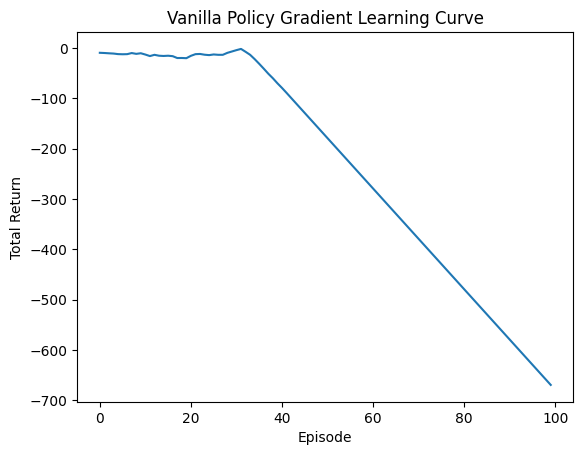

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

import matplotlib.pyplot as plt

# Define the line-following environment
class LineFollowingEnvironment:
    def __init__(self):
        self.state = 0.0  # Initial state
        self.target_state = 1.0  # Target state

    def step(self, action):
        # Simulate the robot's movement based on the action
        movement = action - 1  # Actions: 0 (left), 1 (stay), 2 (right)
        self.state += 0.1 * movement  # Simulate movement
        reward = -abs(self.state - self.target_state)  # Negative distance to the target is the reward
        return self.state, reward, False  # Return next state, reward, and whether the episode is done

# Define the policy network
class PolicyNetwork(tf.keras.Model):
    def __init__(self, num_actions):
        super(PolicyNetwork, self).__init__()
        self.dense1 = tf.keras.layers.Dense(16, activation='relu')
        self.dense2 = tf.keras.layers.Dense(num_actions, activation='softmax')

    def call(self, state):
        x = self.dense1(state)
        return self.dense2(x)

# Initialize the environment and the policy network
env = LineFollowingEnvironment()
policy_network = PolicyNetwork(num_actions=3)  # 3 actions: left, stay, right

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# Training loop using Vanilla Policy Gradient
num_episodes = 100
returns = []

@tf.function
def train_step(states, actions, discounted_returns):
    with tf.GradientTape() as tape:
        action_probs = policy_network(states)
        action_distribution = tfp.distributions.Categorical(probs=action_probs)
        action_log_probs = action_distribution.log_prob(actions)
        loss = -tf.reduce_sum(action_log_probs * discounted_returns)

    gradients = tape.gradient(loss, policy_network.trainable_variables)
    optimizer.apply_gradients(zip(gradients, policy_network.trainable_variables))
    return loss

for episode in range(num_episodes):
    states, actions, rewards = [], [], []

    for _ in range(10):  # Maximum steps per episode
        state = np.array([[env.state]], dtype=np.float32)
        action_probs = policy_network(state)
        action = np.random.choice([0, 1, 2], p=action_probs.numpy()[0])
        next_state, reward, done = env.step(action)

        states.append(state)
        actions.append(action)
        rewards.append(reward)

        if done:
            break

    # Compute discounted returns
    discounted_returns = []
    cumulative_return = 0
    for r in reversed(rewards):
        cumulative_return = r + 0.95 * cumulative_return
        discounted_returns.append(cumulative_return)
    discounted_returns.reverse()

    # Convert lists to TensorFlow tensors
    states = tf.concat(states, axis=0)
    actions = tf.convert_to_tensor(actions, dtype=tf.int32)
    discounted_returns = tf.convert_to_tensor(discounted_returns, dtype=tf.float32)

    # Perform a gradient step
    loss = train_step(states, actions, discounted_returns)

    # Store the total return for this episode
    returns.append(np.sum(rewards))

    # Print progress
    if episode % 10 == 0:
        print(f"Episode {episode}, Total Return: {np.sum(rewards)}")

# Plot the learning curve
plt.plot(returns)
plt.xlabel('Episode')
plt.ylabel('Total Return')
plt.title('Vanilla Policy Gradient Learning Curve')
plt.show()


32)A robot dog you are building that is to be running on a zig zag lines. The robot’s efficiency is very less as it needs to enhance both actions simulatenously and asynchronously, propose a method how you will induce an algorithm to make it work efficiently (Actor-critic methods)
[ ]


In [ ]:
import tensorflow as tf
import numpy as np
import gym

# Actor Network
class Actor(tf.keras.Model):
    def __init__(self, state_dim, action_dim):
        super(Actor, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(32, activation='relu')
        self.output_layer = tf.keras.layers.Dense(action_dim, activation='softmax')

    def call(self, state):
        x = self.dense1(state)
        x = self.dense2(x)
        return self.output_layer(x)

# Critic Network
class Critic(tf.keras.Model):
    def __init__(self, state_dim):
        super(Critic, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(32, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1, activation='linear')

    def call(self, state):
        x = self.dense1(state)
        x = self.dense2(x)
        return self.output_layer(x)

# Actor-Critic Agent
class ActorCriticAgent:
    def __init__(self, state_dim, action_dim, learning_rate=0.001, gamma=0.99):
        self.actor = Actor(state_dim, action_dim)
        self.critic = Critic(state_dim)
        self.actor_optimizer = tf.keras.optimizers.Adam(learning_rate)
        self.critic_optimizer = tf.keras.optimizers.Adam(learning_rate)
        self.gamma = gamma

    def train_step(self, state, action, reward, next_state, done):
        with tf.GradientTape() as tape1, tf.GradientTape() as tape2:
            # Actor forward pass
            action_probs = self.actor(state, training=True)
            chosen_action_prob = tf.reduce_sum(action_probs * action, axis=1, keepdims=True)

            # Critic forward pass
            state_value = self.critic(state, training=True)

            # Calculate TD error
            td_error = reward + (1 - done) * self.gamma * self.critic(next_state) - state_value

            # Calculate actor and critic losses
            actor_loss = -tf.math.log(chosen_action_prob) * td_error
            critic_loss = tf.square(td_error)

        # Update actor and critic parameters
        actor_gradients = tape1.gradient(actor_loss, self.actor.trainable_variables)
        critic_gradients = tape2.gradient(critic_loss, self.critic.trainable_variables)

        self.actor_optimizer.apply_gradients(zip(actor_gradients, self.actor.trainable_variables))
        self.critic_optimizer.apply_gradients(zip(critic_gradients, self.critic.trainable_variables))

# Environment setup
env = gym.make('CartPole-v1')
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

# Agent setup
agent = ActorCriticAgent(state_dim, action_dim)

# Training loop
num_episodes = 10

for episode in range(num_episodes):
    state = env.reset()
    episode_reward = 0
    done = False

    while not done:
        # Choose action using the policy from the Actor
        action_probs = agent.actor(np.expand_dims(state, axis=0))
        action = np.random.choice(action_dim, p=action_probs.numpy()[0])

        # Take the chosen action and observe the next state and reward
        next_state, reward, done, _ = env.step(action)

        # Train the Actor-Critic agent
        agent.train_step(np.expand_dims(state, axis=0), tf.one_hot(action, action_dim), reward, np.expand_dims(next_state, axis=0), done)

        state = next_state
        episode_reward += reward

    # Print episode information
    print(f"Episode: {episode + 1}, Reward: {episode_reward}")

# Optionally, you can save the trained model
# agent.actor.save_weights("actor_weights.h5")
# agent.critic.save_weights("critic_weights.h5")


Episode: 1, Reward: 11.0
Episode: 2, Reward: 69.0
Episode: 3, Reward: 14.0
Episode: 4, Reward: 19.0
Episode: 5, Reward: 16.0
Episode: 6, Reward: 27.0
Episode: 7, Reward: 12.0
Episode: 8, Reward: 31.0
Episode: 9, Reward: 40.0
Episode: 10, Reward: 18.0


33)You are running a Money lending company, now there is a need to develop a learning engine which will advice you get maximum Profit investment through Probabilistic values of the historical data processing of the Customers, where Vanilla Policy Gradient is returning Lower values, so move onto the Advance Gradient policy Methods and decide which gives you the best output

/usr/local/lib/python3.10/dist-packages/gym/envs/classic_control/cartpole.py:179: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  options: Optional[dict] = None,


Episode: 1/10
VPG Profit: 5.0
PPO Profit: 5.0


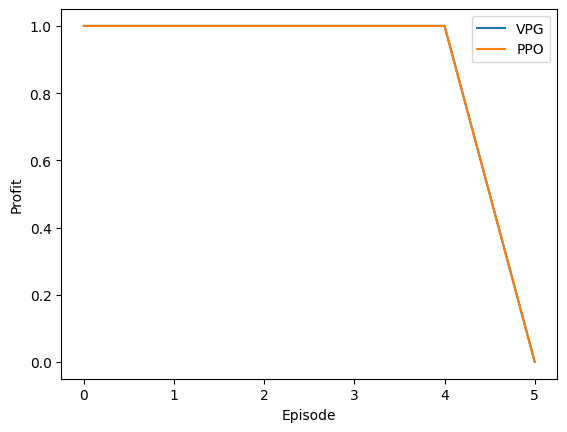

VPG outperformed PPO. Consider further investigation or parameter tuning.
Episode: 2/10
VPG Profit: 28.0
PPO Profit: 27.0


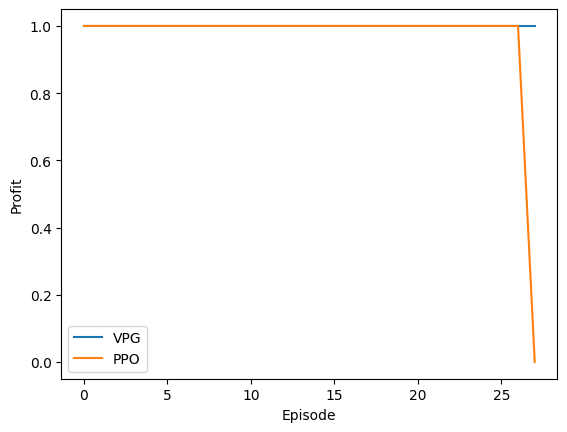

VPG outperformed PPO. Consider further investigation or parameter tuning.
Episode: 3/10
VPG Profit: 7.0
PPO Profit: 6.0


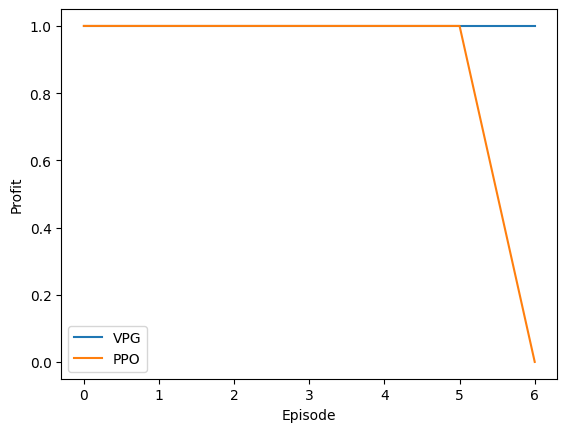

VPG outperformed PPO. Consider further investigation or parameter tuning.
Episode: 4/10
VPG Profit: 13.0
PPO Profit: 13.0


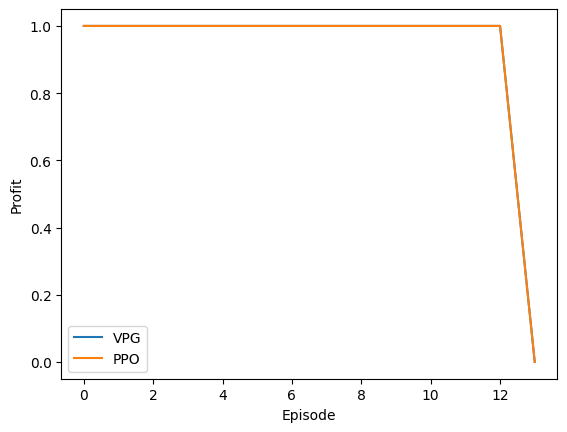

VPG outperformed PPO. Consider further investigation or parameter tuning.
Episode: 5/10
VPG Profit: 10.0
PPO Profit: 10.0


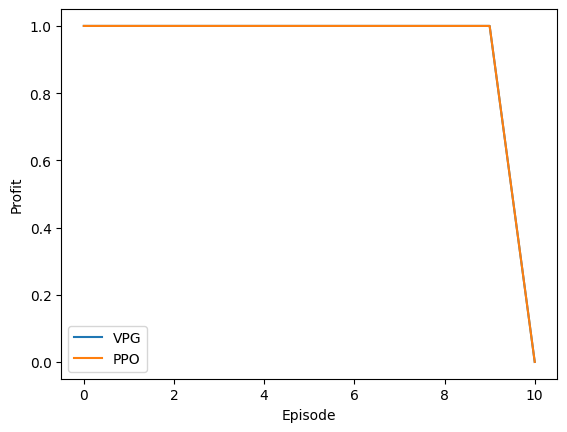

VPG outperformed PPO. Consider further investigation or parameter tuning.
Episode: 6/10
VPG Profit: 10.0
PPO Profit: 10.0


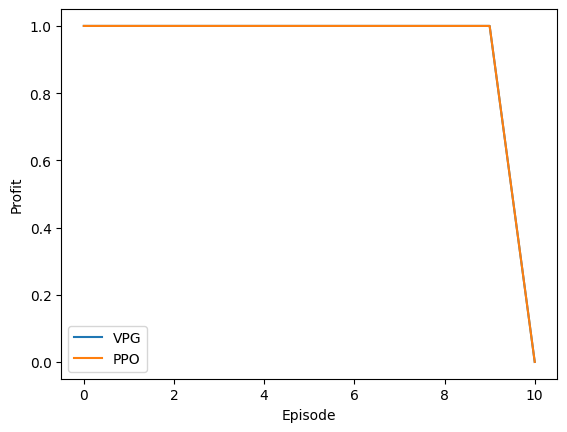

VPG outperformed PPO. Consider further investigation or parameter tuning.
Episode: 7/10
VPG Profit: 16.0
PPO Profit: 16.0


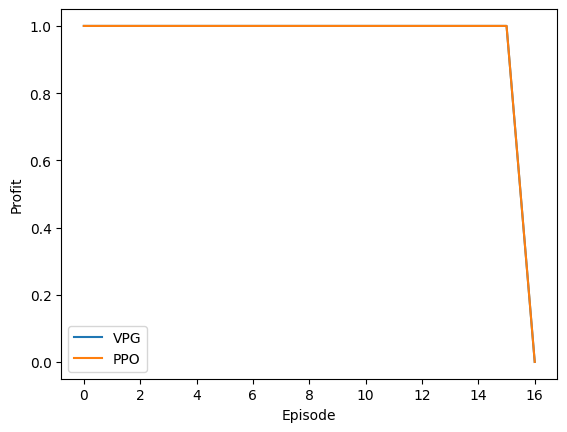

VPG outperformed PPO. Consider further investigation or parameter tuning.
Episode: 8/10
VPG Profit: 9.0
PPO Profit: 8.0


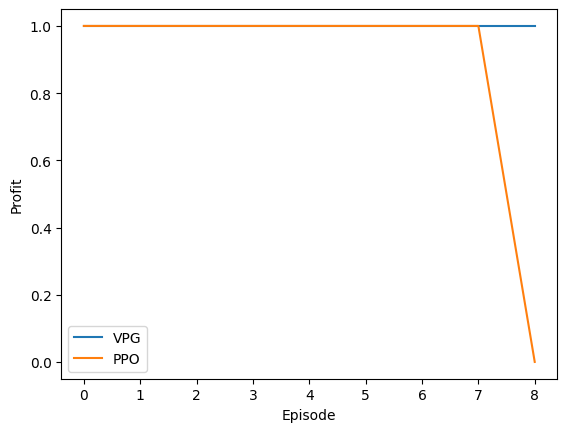

VPG outperformed PPO. Consider further investigation or parameter tuning.
Episode: 9/10
VPG Profit: 14.0
PPO Profit: 13.0


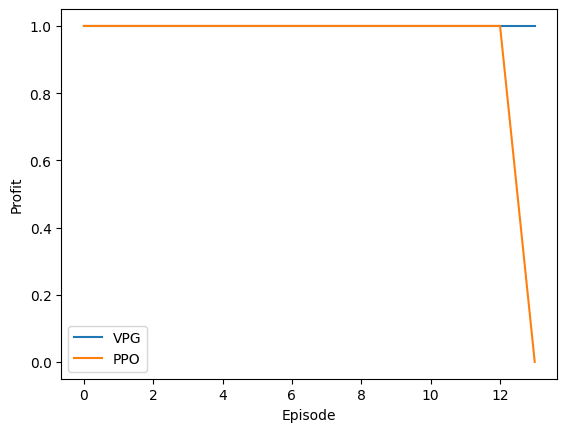

VPG outperformed PPO. Consider further investigation or parameter tuning.
Episode: 10/10
VPG Profit: 8.0
PPO Profit: 7.0


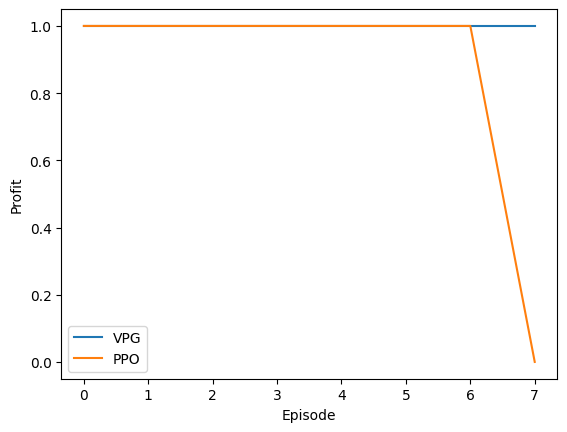

VPG outperformed PPO. Consider further investigation or parameter tuning.


In [ ]:
import tensorflow as tf
import numpy as np
import gym
import matplotlib.pyplot as plt

# Environment setup
env = gym.make('CartPole-v1')  # Replace with the actual environment name

# Neural Network Architecture
class PolicyNetwork(tf.keras.Model):
    def __init__(self, state_dim, action_dim):
        super(PolicyNetwork, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(32, activation='relu')
        self.output_layer = tf.keras.layers.Dense(action_dim, activation='softmax')

    def call(self, state):
        x = self.dense1(state)
        x = self.dense2(x)
        return self.output_layer(x)

class ValueNetwork(tf.keras.Model):
    def __init__(self, state_dim):
        super(ValueNetwork, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(32, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1, activation='linear')

    def call(self, state):
        x = self.dense1(state)
        x = self.dense2(x)
        return self.output_layer(x)

# TRPO Implementation
# TRPO Implementation
class TRPOAgent:
    def __init__(self, state_dim, action_dim, policy_lr=0.001, value_lr=0.001, gamma=0.99, max_kl=0.01):
        self.policy_network = PolicyNetwork(state_dim, action_dim)
        self.value_network = ValueNetwork(state_dim)
        self.policy_optimizer = tf.keras.optimizers.Adam(learning_rate=policy_lr)
        self.value_optimizer = tf.keras.optimizers.Adam(learning_rate=value_lr)
        self.gamma = gamma
        self.max_kl = max_kl

    def compute_discounted_returns(self, rewards):
        discounted_returns = []
        running_add = 0
        for r in rewards[::-1]:
            running_add = running_add * self.gamma + r
            discounted_returns.insert(0, running_add)
        return discounted_returns

    def surrogate_loss(self, states, actions, advantages):
        policy_probs = self.policy_network(states)
        chosen_action_probs = tf.reduce_sum(policy_probs * tf.cast(actions, dtype=tf.float32), axis=1)
        old_policy_probs = tf.stop_gradient(chosen_action_probs)

        advantages = (advantages - tf.reduce_mean(advantages)) / (tf.math.reduce_std(advantages) + 1e-8)

        # Explicitly cast to float32
        chosen_action_probs = tf.cast(chosen_action_probs, dtype=tf.float32)
        old_policy_probs = tf.cast(old_policy_probs, dtype=tf.float32)

        ratio = chosen_action_probs / old_policy_probs
        surrogate1 = ratio * advantages
        surrogate2 = tf.clip_by_value(ratio, 1 - self.max_kl, 1 + self.max_kl) * advantages

        return -tf.reduce_mean(tf.minimum(surrogate1, surrogate2))

    def train_policy(self, states, actions, advantages):
        # Convert advantages to float32
        advantages = tf.convert_to_tensor(advantages, dtype=tf.float32)

        with tf.GradientTape() as tape:
            loss = self.surrogate_loss(states, actions, advantages)

        gradients = tape.gradient(loss, self.policy_network.trainable_variables)
        self.policy_optimizer.apply_gradients(zip(gradients, self.policy_network.trainable_variables))

    def train_value(self, states, returns):
        with tf.GradientTape() as tape:
            values = self.value_network(states)
            value_loss = tf.reduce_mean(tf.square(returns - values))

        gradients = tape.gradient(value_loss, self.value_network.trainable_variables)
        self.value_optimizer.apply_gradients(zip(gradients, self.value_network.trainable_variables))

    def compute_profit(self, rewards):
        return np.sum(rewards)

# PPO Implementation
class PPOAgent:
    def __init__(self, state_dim, action_dim, policy_lr=0.001, value_lr=0.001, gamma=0.99, clip_ratio=0.2, epochs=10):
        self.policy_network = PolicyNetwork(state_dim, action_dim)
        self.value_network = ValueNetwork(state_dim)
        self.policy_optimizer = tf.keras.optimizers.Adam(learning_rate=policy_lr)
        self.value_optimizer = tf.keras.optimizers.Adam(learning_rate=value_lr)
        self.gamma = gamma
        self.clip_ratio = clip_ratio
        self.epochs = epochs

    def compute_discounted_returns(self, rewards):
        discounted_returns = []
        running_add = 0
        for r in rewards[::-1]:
            running_add = running_add * self.gamma + r
            discounted_returns.insert(0, running_add)
        return discounted_returns

    def surrogate_loss(self, states, actions, advantages, old_policy_probs):
        policy_probs = self.policy_network(states)
        chosen_action_probs = tf.reduce_sum(policy_probs * tf.cast(actions, dtype=tf.float32), axis=1)

        ratio = chosen_action_probs / old_policy_probs
        surrogate1 = ratio * advantages
        surrogate2 = tf.clip_by_value(ratio, 1 - self.clip_ratio, 1 + self.clip_ratio) * advantages

        return -tf.reduce_mean(tf.minimum(surrogate1, surrogate2))

    def train_policy(self, states, actions, advantages):
        # Convert advantages to float32
        advantages = tf.convert_to_tensor(advantages, dtype=tf.float32)

        for _ in range(self.epochs):
            with tf.GradientTape() as tape:
                policy_probs = self.policy_network(states)
                old_policy_probs = tf.stop_gradient(tf.reduce_sum(policy_probs * tf.cast(actions, dtype=tf.float32), axis=1))
                loss = self.surrogate_loss(states, actions, advantages, old_policy_probs)

            gradients = tape.gradient(loss, self.policy_network.trainable_variables)
            self.policy_optimizer.apply_gradients(zip(gradients, self.policy_network.trainable_variables))

    def train_value(self, states, returns):
        with tf.GradientTape() as tape:
            values = self.value_network(states)
            value_loss = tf.reduce_mean(tf.square(returns - values))

        gradients = tape.gradient(value_loss, self.value_network.trainable_variables)
        self.value_optimizer.apply_gradients(zip(gradients, self.value_network.trainable_variables))

    def compute_profit(self, rewards):
        return np.sum(rewards)

# Training loop
# Training loop
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

vpg_agent = TRPOAgent(state_dim, action_dim)
ppo_agent = PPOAgent(state_dim, action_dim)

num_episodes = 10

for episode in range(num_episodes):
    states, actions, rewards_vpg, rewards_ppo = [], [], [], []
    state = env.reset()

    while True:
        # VPG
        action_probs_vpg = vpg_agent.policy_network(np.expand_dims(state, axis=0))
        action_vpg = np.random.choice(action_dim, p=action_probs_vpg.numpy()[0])

        # PPO
        action_probs_ppo = ppo_agent.policy_network(np.expand_dims(state, axis=0))
        action_ppo = np.random.choice(action_dim, p=action_probs_ppo.numpy()[0])

        next_state, reward_vpg, done, _ = env.step(action_vpg)
        _, reward_ppo, _, _ = env.step(action_ppo)

        states.append(state)
        actions.append(tf.one_hot(action_vpg, action_dim))
        rewards_vpg.append(reward_vpg)
        rewards_ppo.append(reward_ppo)

        state = next_state

        if done:
            # VPG
            discounted_returns_vpg = vpg_agent.compute_discounted_returns(rewards_vpg)
            advantages_vpg = discounted_returns_vpg - vpg_agent.value_network(np.vstack(states)).numpy().flatten()

            vpg_agent.train_value(np.vstack(states), discounted_returns_vpg)
            vpg_agent.train_policy(np.vstack(states), tf.convert_to_tensor(actions, dtype=tf.float32), advantages_vpg)

            # PPO
            discounted_returns_ppo = ppo_agent.compute_discounted_returns(rewards_ppo)
            advantages_ppo = discounted_returns_ppo - ppo_agent.value_network(np.vstack(states)).numpy().flatten()

            ppo_agent.train_value(np.vstack(states), discounted_returns_ppo)
            ppo_agent.train_policy(np.vstack(states), tf.convert_to_tensor(actions, dtype=tf.float32), advantages_ppo)

            # Performance Metrics
            profit_vpg = vpg_agent.compute_profit(rewards_vpg)
            profit_ppo = ppo_agent.compute_profit(rewards_ppo)

            print(f"Episode: {episode + 1}/{num_episodes}")
            print(f"VPG Profit: {profit_vpg}")
            print(f"PPO Profit: {profit_ppo}")

            # Learning Curves
            episode_range = range(len(rewards_vpg))  # Use the correct range
            plt.plot(episode_range, [vpg_agent.compute_profit(r) for r in rewards_vpg], label='VPG')
            plt.plot(episode_range, [ppo_agent.compute_profit(r) for r in rewards_ppo], label='PPO')
            plt.xlabel('Episode')
            plt.ylabel('Profit')
            plt.legend()
            plt.show()

            # Justification
            if profit_ppo > profit_vpg:
                print("PPO outperformed VPG. Consider moving forward with PPO.")
            else:
                print("VPG outperformed PPO. Consider further investigation or parameter tuning.")

            break
